# Emergency Medical Services Response Performance Analysis

![Ambulance](images/ambulance1.jpg)

*Image source: [Envato.com](https://envato.com)*

---

## Introduction

Efficient emergency medical services (EMS) are critical for saving lives and minimizing harm in emergencies. Response Time Compliance (RTC) is a key metric used to measure the effectiveness of EMS operations. This project analyzes 10 years of EMS operational data to identify factors influencing RTC and provide actionable recommendations to improve compliance.

### Goals of the Project

1. Identify key factors influencing Response Time Compliance (RTC).
2. Explore data trends and relationships through statistical and visual analysis.
3. Develop predictive models to classify incidents as compliant or non-compliant with RTC standards.
4. Provide actionable recommendations for operational improvements.

### Key Metrics

- **Response Time Compliance (RTC)**: Achieving a response time of 540 seconds or less for emergent incidents.
- **Chute Time**: The time between unit assignment and movement.
- **Dist_mean**: Average distance from resource to incident.

This analysis focuses on uncovering operational inefficiencies, resource allocation challenges, and potential areas for improvement in EMS performance.

## Business Understanding

### Business Problem
An urban Emergency Medical Services (EMS) agency is attempting to identify factors which they can manipulate in order to improve operational efficiency. The agency runs approximately 130,000 911 calls for service each year. Over the last several years, the agency has implemented brand new resources like basic life support, and single resource 'fly' cars in an attempt to provide the right resources to the right patients at the right time. Currently, the agency's primary operational metric is Response Time Compliance (RTC). The RTC goal is to have a 90th percentile response time to emergent calls in 9 minutes or less.

### Objective:
- **Goal:** Analyze data to identify factors that have the most impact on RTC. Create a viable model which can provide explanatory insights into the operational impacts of RTC.

- **Key Questions:**

  1. What factors influence RTC?
  2. Can a model accurately identify cases of compliance and non-compliance?

- **Success Criteria:**

  1. Identify modifiable features which can be manipulated to hopefully improve RTC.

## Data Understanding

### Dataset Overview

This analysis uses the **EMS Operations Hourly Data**, a comprehensive dataset containing aggregated hourly operational and environmental metrics for a large urban 911 EMS system. The dataset spans from **November 1, 2014, to November 1, 2024**, capturing approximately 130,000 911 calls annually. The data was aggregated from a **Computer-Aided Dispatch (CAD)** SQL database and includes various features related to incidents, resource usage, and environmental conditions.

Key points about the dataset:
- **Source**: Aggregated CAD data for operational metrics and the [Open-Meteo Historical Weather API](https://open-meteo.com/) for environmental data.
- **Scope**: Captures EMS operations and responses, including both emergent and non-emergent incidents.
- **Challenges**: Some metrics were inconsistently collected over time, requiring cleaning and imputation.

---

### Columns Description

The dataset contains 33 columns, each providing specific operational or environmental details. Below are the key features:

#### Temporal Features
- **year, month, day, day_of_week, hour**: These fields provide the temporal context for each record, allowing analysis of trends over time.

#### Incident Metrics
- **incident_count**: Total number of incidents logged in the CAD system. Not all incidents result in a dispatch or response.
- **emergent_responses, non_emergent_responses**: Count of dispatched responses, categorized by emergency priority.

#### Response Times
- **mean_response_all, mean_response_emergent, mean_response_non_emergent**: Average response times in seconds for all incidents, emergencies, and non-emergencies, respectively.
- **percentile_90_response_all, percentile_90_response_emergent, percentile_90_response_non_emergent**: 90th percentile of response times, a critical metric for understanding Response Time Compliance (RTC).

#### Resource Utilization
- **bls_ambulances, als_ambulances, satellite_ambulances, fly_cars, total_cars**: Metrics capturing the availability and type of vehicles used during each hour.
- **non_emergent_transports, emergent_transports**: Count of patient transports, split by emergency status.

#### Operational Conditions
- **base_ed_divert, system_overload, weather_status**: Indicators of system constraints, such as hospital diversions, operational overload, and severe weather conditions.

#### Environmental Factors
- **temperature, rain, snowfall**: Environmental conditions that may influence operational efficiency and response times. These data were sourced from the [Open-Meteo Historical Weather API](https://open-meteo.com/), providing accurate hourly weather metrics to enhance analysis.

#### Distance and Delays
- **dist_mean**: Average distance (in miles) between resource location at dispatch and incident scene.
- **chute_times_all, chute_times_emergent, chute_times_non_emergent**: Average chute times (time from assignment to resource movement) for different incident types.

---

### Summary Statistics for Critical Features

| Feature                     | Description                                          | Mean     | Median   | Min    | Max      | Std Dev |
|-----------------------------|------------------------------------------------------|----------|----------|--------|----------|---------|
| **dist_mean**               | Average distance (miles) to incident                | 3.88     | 2.58     | 0.01   | 2623.57  | 27.13   |
| **chute_times_emergent**    | Chute time for emergent incidents (seconds)         | 99.10    | 95.44    | 1.70   | 944.44   | 29.61   |
| **percentile_90_response_emergent** | 90th percentile response time for emergent incidents (seconds) | 508.33   | 487.00   | 1.00   | 1742.50  | 146.66  |
| **als_ambulances**          | Count of ALS ambulances                             | 13.30    | 14.00    | 0.00   | 37.83    | 5.60    |
| **total_cars**              | Total cars available                                | 14.36    | 15.00    | 0.00   | 45.57    | 5.84    |
| **perc_from_hosp**          | Percentage of resources dispatched from hospitals   | 0.14     | 0.13     | 0.00   | 1.00     | 0.12    |
| **rain**                    | Hourly rainfall (millimeters)                            | 0.03     | 0.00     | 0.00   | 11.40    | 0.23    |
| **temperature**             | Hourly temperature (°C)                             | 9.60     | 9.66     | -36.65 | 38.30    | 11.99   |

---

### Data Quality

Initial exploration highlighted the following data quality aspects:
- **Missing Values**: Certain columns, such as `chute_times_emergent`, have missing values requiring imputation or exclusion.
- **Data Cleaning**: Rows with invalid or extreme values (e.g., `total_cars` = 0) were removed to ensure reliability.
- **Derived Features**: Several columns, like `tx_per_ambulance` and `resp_per_ambulance`, were engineered to provide additional insights.

---

### Key Metric: Response Time Compliance (RTC)

RTC is calculated based on the **90th percentile response time** for emergent incidents. According to the National Fire Protection Association (NFPA) Standard 1710, compliance requires a 9-minute response time (540 seconds) for ALS units in at least 90% of incidents. This metric serves as the primary indicator of operational performance.

---

### Summary

The EMS Operations Hourly Data provides a rich dataset for analyzing and modeling factors affecting RTC. With over 87,000 records spanning 10 years, it captures the complexity of urban EMS operations while presenting challenges like data inconsistencies and missing values. Environmental data from the [Open-Meteo Historical Weather API](https://open-meteo.com/) adds an important layer to understanding the effects of external conditions on EMS performance.


In [96]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Statistical Analysis
import statsmodels.api as sm
from helper import ComplianceTester

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    make_scorer
)

# Model Selection and Cross-Validation
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_val_score
)

# Pipelines and Saving Models
from sklearn.pipeline import Pipeline
import pickle
import os

In [97]:
# Data loading and preview

data = pd.read_csv('data/ems_ops.csv')
data.head()

year  month  day day_of_week  hour  incident_count  dist_mean  \
0  2014     11    1         Sat     0              13   1.585860   
1  2014     11    1         Sat     1              24   3.213414   
2  2014     11    1         Sat     2              26   2.709078   
3  2014     11    1         Sat     3               8   3.461524   
4  2014     11    1         Sat     4               6   1.970146   

   perc_from_hosp  base_ed_divert  system_overload  weather_status       RTC  \
0        0.153846               0                0               0  1.000000   
1        0.166667               0                0               0  0.937500   
2        0.269231               1                1               0  0.904762   
3        0.375000               1                1               0  1.000000   
4        0.000000               1                1               0  0.833333   

   emergent_responses  non_emergent_responses  mean_response_all  \
0                   7                     4.0         380.909091   
1                  16                     5.0         407.571429   
2                  21                     5.0         389.153846   
3                   3                     4.0         396.285714   
4                   6                     0.0         332.833333   

   mean_response_emergent  mean_response_non_emergent  \
0              267.571429                      579.25   
1              326.437500                      667.20   
2              355.047619                      532.40   
3              298.666667                      469.50   
4              332.833333                        0.00   

   percentile_90_response_all  percentile_90_response_emergent  \
0                       576.0                            439.2   
1                       725.0                            522.0   
2                       699.0                            511.0   
3                       624.0                            347.4   
4                       577.5                            577.5   

   percentile_90_response_non_emergent  bls_ambulances  satellite_ambulances  \
0                                759.4             0.0                   0.0   
1                                817.6             0.0                   0.0   
2                               1007.0             0.0                   0.0   
3                                688.5             0.0                   0.0   
4                                  0.0             0.0                   0.0   

   als_ambulances  fly_cars  total_cars  non_emergent_transports  \
0             0.0       0.0         0.0                      6.0   
1             0.0       0.0         0.0                     14.0   
2             0.0       0.0         0.0                     16.0   
3             0.0       0.0         0.0                     14.0   
4             0.0       0.0         0.0                      2.0   

   emergent_transports  chute_times_all  chute_times_non_emergent  \
0                  1.0              NaN                       NaN   
1                  NaN              NaN                       NaN   
2                  2.0              NaN                       NaN   
3                  NaN              NaN                       NaN   
4                  2.0              NaN                       NaN   

   chute_times_emergent  temperature  rain  snowfall  
0                   NaN      12.2545   0.0       0.0  
1                   NaN      10.3545   0.0       0.0  
2                   NaN       8.7045   0.0       0.0  
3                   NaN       7.2545   0.0       0.0  
4                   NaN       5.5045   0.0       0.0

In [98]:
# Data overview
# Set the option to display all columns
pd.set_option('display.max_columns', None)

data.describe()

year         month           day          hour  incident_count  \
count  87088.000000  87088.000000  87088.000000  87088.000000    87088.000000   
mean    2019.340185      6.523964     15.732569     11.544817       12.329242   
std        2.896795      3.448693      8.802954      6.914466        5.203629   
min     2014.000000      1.000000      1.000000      0.000000        1.000000   
25%     2017.000000      4.000000      8.000000      6.000000        8.000000   
50%     2019.000000      7.000000     16.000000     12.000000       12.000000   
75%     2022.000000     10.000000     23.000000     18.000000       16.000000   
max     2024.000000     12.000000     31.000000     23.000000       88.000000   

          dist_mean  perc_from_hosp  base_ed_divert  system_overload  \
count  87088.000000    87088.000000    87088.000000     87088.000000   
mean       3.877920        0.143623        0.117008         0.249070   
std       27.129300        0.120634        0.321432         0.432477   
min        0.008578        0.000000        0.000000         0.000000   
25%        2.112666        0.055556        0.000000         0.000000   
50%        2.581790        0.130435        0.000000         0.000000   
75%        3.157333        0.214286        0.000000         0.000000   
max     2623.566100        1.000000        1.000000         1.000000   

       weather_status           RTC  emergent_responses  \
count    87088.000000  87088.000000        87088.000000   
mean         0.006752      0.882147            7.742766   
std          0.081892      0.153357            3.729647   
min          0.000000      0.000000            1.000000   
25%          0.000000      0.800000            5.000000   
50%          0.000000      0.923077            7.000000   
75%          0.000000      1.000000           10.000000   
max          1.000000      1.000000           27.000000   

       non_emergent_responses  mean_response_all  mean_response_emergent  \
count            87088.000000       87088.000000            87088.000000   
mean                 3.068632         434.538436              358.594131   
std                  1.979666          97.731440               86.116725   
min                  0.000000           5.538462                1.000000   
25%                  2.000000         366.750000              301.727273   
50%                  3.000000         426.000000              348.750000   
75%                  4.000000         492.538462              403.960526   
max                 15.000000        1541.000000             1732.000000   

       mean_response_non_emergent  percentile_90_response_all  \
count                87088.000000                87088.000000   
mean                   578.353522                  687.013872   
std                    273.714230                  205.475725   
min                      0.000000                    6.000000   
25%                    438.500000                  538.900000   
50%                    580.750000                  657.500000   
75%                    735.000000                  804.025000   
max                   1801.000000                 1795.000000   

       percentile_90_response_emergent  percentile_90_response_non_emergent  \
count                     87088.000000                         87088.000000   
mean                        508.327457                           751.153516   
std                         146.660822                           364.075128   
min                           1.000000                             0.000000   
25%                         412.500000                           545.300000   
50%                         487.000000                           753.000000   
75%                         578.800000                           983.500000   
max                        1742.500000                          1801.000000   

       bls_ambulances  satellite_ambulances  als_ambulances      fly_cars  \
count    87088.000000          87088.000000 

In [99]:
# Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87088 entries, 0 to 87087
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 87088 non-null  int64  
 1   month                                87088 non-null  int64  
 2   day                                  87088 non-null  int64  
 3   day_of_week                          87088 non-null  object 
 4   hour                                 87088 non-null  int64  
 5   incident_count                       87088 non-null  int64  
 6   dist_mean                            87088 non-null  float64
 7   perc_from_hosp                       87088 non-null  float64
 8   base_ed_divert                       87088 non-null  int64  
 9   system_overload                      87088 non-null  int64  
 10  weather_status                       87088 non-null  int64  
 11  RTC                         

## Data Preparation

### Overview

The **EMS Operations Hourly Data** required significant cleaning and preprocessing to ensure the dataset was accurate, consistent, and ready for analysis. This section outlines the challenges encountered, the cleaning steps performed, and the tools and techniques employed to prepare the data.

---

### Challenges with the Data

1. **Missing Values**:
   - Several columns, particularly those related to chute times (`chute_times_all`, `chute_times_non_emergent`, `chute_times_emergent`), contained missing values.
   - Missing values were also present in transport-related fields like `non_emergent_transports` and `emergent_transports`.

2. **Invalid or Extreme Values**:
   - Certain rows had unrealistic values, such as `total_cars` equal to zero, which does not align with operational realities.
   - Distances (`dist_mean`) occasionally showed extreme outliers likely caused by errors in resource tracking or data aggregation.

3. **Inconsistent Collection**:
   - Some metrics were inconsistently recorded over time, requiring additional handling, such as imputation or exclusion of early records.

4. **Derived and Redundant Features**:
   - Columns like `mean_response_all`, which were derived from other fields, introduced redundancy and were dropped during the cleaning process.

---

### Cleaning Steps

1. **Handling Missing Values**:
   - For missing chute times, a **KNN Imputer** was used. This approach takes the mean value from the k-nearest rows based on similarity in other features, providing a robust estimate for the missing values.
   - Missing transport values were filled with `0`, assuming no transports occurred when data was missing.

2. **Removing Invalid and Extreme Values**:
   - Rows with `total_cars` values less than 1 were dropped, as these represented invalid operational scenarios.
   - Outliers in `dist_mean` were filtered based on a threshold of the mean plus one standard deviation, representing reasonable travel distances within the city.

3. **Dropping Redundant Features**:
   - Derived fields like `mean_response_all`, `percentile_90_response_all`, and other highly correlated or non-essential columns were removed to reduce dimensionality and avoid redundancy.

---

### Feature Engineering

To improve the dataset's utility for analysis, several new features were created:

1. **Operational Ratios**:
   - `tx_per_ambulance`: Transports per transporting car.
   - `resp_per_ambulance`: Responses per responding unit.
   - `als_resources_per_emergent_response`: Ratio of ALS resources to emergent responses.

2. **Time-Based Features**:
   - Flags for peak operational hours (`is_peak`) and system overloads (`overload_flag`) were introduced to capture time-sensitive patterns.
   - Rolling averages (`rolling_emergent_avg`) and lagged variables (e.g., `emergent_responses_lag1`) were created to incorporate temporal dependencies.

3. **Interaction Features**:
   - `dist_mean_is_peak`: Interaction between average distance and peak hours.
   - `tx_per_ambulance_is_peak`: Interaction between transport efficiency and peak hours.
   - `rolling_emergent_avg_interaction`: Interaction between rolling emergent average and lagged response times.

4. **Utilization Efficiency**:
   - A custom metric, `utilization_efficiency`, was calculated as the ratio of responses per ambulance to transports per ambulance.

---

### Tools and Techniques

1. **Libraries Used**:
   - **Pandas**: For data manipulation and filtering.
   - **NumPy**: For statistical calculations and handling missing data.
   - **SciKit-Learn**:
     - **KNN Imputer**: To impute missing values based on nearest neighbors.
     - **StandardScaler**: For normalizing features in subsequent modeling steps.

2. **Data Inspection**:
   - Used `data.info()` and `data.describe()` to assess the completeness, distribution, and summary statistics of the dataset.

3. **Validation**:
   - Visual inspection of outliers and histograms ensured that cleaning and filtering steps preserved the data's integrity.

---

### Summary

- The dataset originally contained **87,088 rows**, which was reduced to **51,530 rows** after removing invalid or incomplete entries.
- Missing values were addressed through imputation for critical columns (`chute_times_emergent`) and logical default values for transport-related fields.
- A total of **19 new features** were engineered, adding operational, temporal, and interaction insights crucial for understanding RTC dynamics.
- Outlier removal and redundant feature elimination improved data reliability and reduced noise, creating a focused dataset for analysis.

By cleaning the dataset and engineering relevant features, this phase directly supports the business objective of identifying actionable factors that influence RTC and ensures the data is ready for robust modeling and analysis.

In [100]:
# Check to see how many chute_times_emergent is null
data['chute_times_emergent'].isnull().value_counts()

chute_times_emergent
False    51237
True     35851
Name: count, dtype: int64

In [101]:
# Finding first index where chute time(s) aren't null
first_valid_index = data['chute_times_all'].first_valid_index()
print(first_valid_index)

# Looks like the majority of the early data isn't valid. Too much to impute so I'll drop those
data = data.loc[first_valid_index:]

35199


In [102]:
# Missing values

# tx_counts - if null consider 0
data['non_emergent_transports'] = data['non_emergent_transports'].fillna(0)
data['emergent_transports'] = data['emergent_transports'].fillna(0)
# chute times - impute
knn_imputer = KNNImputer(n_neighbors=5) # Taking the mean value from 5 most similar rows
chute_times = ['chute_times_all', 'chute_times_non_emergent', 'chute_times_emergent']
data[chute_times] = knn_imputer.fit_transform(data[chute_times])

In [103]:
# total_cars min is 0, this should never happen, dropping rows where < 1
data = data[data['total_cars'] >= 1]

In [104]:
# dist_mean: mean + 1 std is roughly the diameter of the city
# Calculate the upper limit
k = 1
mean = data['dist_mean'].mean()
std_dev = data['dist_mean'].std()
upper_limit = mean + k * std_dev

# Filter the dataset
data = data[data['dist_mean'] <= upper_limit]

In [105]:
# Going to drop features that are derivatives of others or otherwise not needed
data = data.drop(columns=['mean_response_all',
                          'mean_response_emergent',
                          'mean_response_non_emergent',
                          'percentile_90_response_all',
                          'RTC',
                          'incident_count',
                          'system_overload'])

In [106]:
# Feature engineering

# tx_per_ambulance: Transports per transporting car
data['tx_per_ambulance'] = np.where(
    (data['als_ambulances'] + data['bls_ambulances'] + data['satellite_ambulances']) == 0,
    0,
    (data['non_emergent_transports'] + data['emergent_transports']) / (data['als_ambulances'] + data['bls_ambulances'] + data['satellite_ambulances'])
)

# resp_per_ambulance: Responses per responding unit
data['resp_per_ambulance'] = np.where(
    data['total_cars'] == 0,
    0,
    (data['emergent_responses'] + data['non_emergent_responses']) / data['total_cars']
)

# als_resources_per_emergent_response: ALS resources per emergent response
data['als_resources_per_emergent_response'] = np.where(
    data['emergent_responses'] == 0,
    0,
    (data['als_ambulances'] + data['satellite_ambulances'] + data['fly_cars']) / data['emergent_responses']
)

# Lags and diffs
data['emergent_responses_lag1'] = data['emergent_responses'].shift(1)
data['non_emergent_responses_lag1'] = data['non_emergent_responses'].shift(1)
data['base_ed_divert_lag1'] = data['base_ed_divert'].shift(1)
data['non_emergent_transports_lag1'] = data['non_emergent_transports'].shift(1)
data['emergent_transports_lag1'] = data['emergent_transports'].shift(1)
data['percentile_90_response_emergent_lag1'] = data['percentile_90_response_emergent'].shift(1)
data['percentile_90_response_emergent_lag2'] = data['percentile_90_response_emergent'].shift(2)

data['total_cars_dif1'] = data['total_cars'].diff()
data['als_ambulances_dif1'] = data['als_ambulances'].diff()
data['bls_ambulances_dif1'] = data['bls_ambulances'].diff()
data['satellite_ambulances_dif1'] = data['satellite_ambulances'].diff()
data['fly_cars_dif1'] = data['fly_cars'].diff()

# Testing features
data['is_peak'] = data['hour'].apply(lambda x: 1 if 7 <= x <= 21 else 0) # Flagging peak times
data['overload_flag'] = (data['emergent_responses'] + data['non_emergent_responses']) > data['total_cars'] # Flag if more calls than cars
data['emergent_ratio'] = np.where(
    (data['emergent_responses'] + data['non_emergent_responses']) == 0,
    0,  # Set ratio to 0 when there are no responses
    data['emergent_responses'] / (data['emergent_responses'] + data['non_emergent_responses'])
) # Proportion of emergent vs. non-emergent calls
data['rolling_emergent_avg'] = data['emergent_responses'].rolling(7).mean() # 7 hour rolling average of emergent responses

# Interaction between distance and peak hours
data['dist_mean_is_peak'] = data['dist_mean'] * data['is_peak']

# Interaction between transports per ambulance and peak hours
data['tx_per_ambulance_is_peak'] = data['tx_per_ambulance'] * data['is_peak']

# Interaction between responses per ambulance and emergent ratio
data['resp_emergent_interaction'] = data['resp_per_ambulance'] * data['emergent_ratio']

# Lagged rolling emergent average
data['rolling_emergent_avg_lag1'] = data['rolling_emergent_avg'].shift(1)

# Interaction between rolling average and lagged response time
data['rolling_emergent_avg_interaction'] = data['rolling_emergent_avg'] * data['percentile_90_response_emergent_lag1']

# Utilization efficiency
data['utilization_efficiency'] = data['resp_per_ambulance'] / (data['tx_per_ambulance'] + 1e-9)

# Dropping NaNs created by lag and diff features
data = data.dropna()

In [107]:
# Handle encoding
data = pd.get_dummies(data, columns=['day_of_week'], drop_first=True)

In [108]:
# Export and save cleaned data
data.to_csv('data/cleaned_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Overview

The exploratory data analysis phase focused on understanding the dataset's structure, identifying patterns, and detecting potential anomalies. The objective was to gain insights into operational trends, resource utilization, and factors influencing Response Time Compliance (RTC). This section outlines key analyses performed, visualizations created, and observations made.

---

### Key Analyses and Visualizations

#### 1. **Correlation Heatmap**
   - **Objective**: Identify relationships between operational metrics and RTC.
   - **Visualization**: Heatmap of correlations between features.
   - **Insights**:
     - Strong correlations were found between `dist_mean` and response times.
     - Resource-related metrics such as `tx_per_ambulance` and `resp_per_ambulance` also exhibited notable relationships with RTC.

#### 2. **Staffing and Responses**
   - **Objective**: Examine resource levels (`total_cars`) compared to response volumes (`emergent_responses` and `non_emergent_responses`).
   - **Visualization**: Line plot comparing total resources to total responses by hour of the day.
   - **Insights**:
     - Staffing levels generally aligned with response volumes but showed occasional gaps during peak hours, indicating opportunities for improved resource deployment.

#### 3. **Class Distribution**
   - **Objective**: Evaluate the distribution of compliance (`<= 540 seconds`) and non-compliance (`> 540 seconds`) incidents.
   - **Visualization**: Bar plot showing the count of compliant and non-compliant incidents.
   - **Insights**:
     - A significant portion of incidents met RTC standards, with non-compliant cases highlighting areas for operational improvement.

#### 4. **Response Times Over Time**
   - **Objective**: Analyze trends in 90th percentile response times for emergent and non-emergent incidents by year.
   - **Visualization**: Line plots of response times over time for both emergent and non-emergent incidents.
   - **Insights**:
     - Emergent response times showed modest improvement over time, while non-emergent response times exhibited greater variability.

#### 5. **Hourly Responses**
   - **Objective**: Investigate patterns in incident volumes by hour of the day.
   - **Visualization**: Line plot of hourly responses, categorized by response type.
   - **Insights**:
     - Incidents peaked during daytime hours, aligning with periods of higher population activity. Non-emergent responses dominated weekend incidents.

#### 6. **Chute Times Analysis**
   - **Objective**: Compare chute times (time between assignment and resource movement) for compliant and non-compliant incidents.
   - **Visualization**:
     - Line plots of chute times over time, split by compliance category.
   - **Insights**:
     - Non-compliant incidents were associated with longer chute times, emphasizing the importance of reducing delays in resource assignment.

#### 7. **Response Type vs. Transport Type**
   - **Objective**: Analyze the relationship between response types (emergent and non-emergent) and transport types.
   - **Visualization**:
     - Line plot comparing emergent and non-emergent transports over time.
   - **Insights**:
     - Non-emergent transports far outnumbered emergent transports, underscoring the importance of managing non-emergent call volumes.

#### 8. **Percentage Dispatched from Hospitals**
   - **Objective**: Assess the proportion of responses dispatched from hospital locations and its relationship to compliance.
   - **Visualization**: Line plot of `perc_from_hosp` over time, categorized by compliance.
   - **Insights**:
     - A higher proportion of non-compliant incidents were dispatched from hospitals, likely due to delays associated with resource availability at these locations.

#### 9. **Mean Distance Analysis**
   - **Objective**: Investigate the impact of `dist_mean` (distance between resource location and incident scene) on compliance.
   - **Visualization**:
     - Box plot and density plot for `dist_mean`, split by compliance.
   - **Insights**:
     - Non-compliant incidents were associated with significantly longer distances, highlighting the importance of strategic resource placement.

---

### Key Findings

1. **Operational Trends**:
   - Resource deployment aligned with incident volumes but revealed gaps during peak hours.
   - Incident volumes were highest during the day, with weekends skewed toward non-emergent responses.

2. **RTC Drivers**:
   - Shorter chute times and reduced distances were critical factors for achieving compliance.
   - The percentage of resources dispatched from hospitals negatively correlated with RTC compliance.

3. **Resource and Transport Relationships**:
   - Non-emergent transports significantly outnumbered emergent transports, emphasizing the need to manage non-emergent operations effectively.

---

### Tools and Techniques

1. **Libraries Used**:
   - **Matplotlib** and **Seaborn** for creating plots and visualizations.
   - **Pandas** and **NumPy** for aggregating and analyzing key metrics.

2. **Techniques**:
   - **Descriptive Statistics**: Used to summarize data distributions and identify outliers.
   - **Correlation Analysis**: Identified significant relationships between features and RTC.
   - **Regression Analysis**: Explored linear relationships between responses, transports, and other metrics.

---

### Summary

The EDA phase provided valuable insights into the dataset's structure and identified critical factors affecting RTC. Key trends in incident volumes, resource utilization, and environmental impacts were visualized, laying the groundwork for feature selection and model development in subsequent phases.

In [109]:
# Checking for any remaining non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51530 entries, 35206 to 87087
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  51530 non-null  int64  
 1   month                                 51530 non-null  int64  
 2   day                                   51530 non-null  int64  
 3   hour                                  51530 non-null  int64  
 4   dist_mean                             51530 non-null  float64
 5   perc_from_hosp                        51530 non-null  float64
 6   base_ed_divert                        51530 non-null  int64  
 7   weather_status                        51530 non-null  int64  
 8   emergent_responses                    51530 non-null  int64  
 9   non_emergent_responses                51530 non-null  float64
 10  percentile_90_response_emergent       51530 non-null  float64
 11  percentile_90_re

In [110]:
# One last inspection
data.describe()

year         month           day          hour     dist_mean  \
count  51530.000000  51530.000000  51530.000000  51530.000000  51530.000000   
mean    2021.360605      6.482554     15.776965     11.541568      2.753905   
std        1.729754      3.439231      8.811299      6.920139      0.905744   
min     2018.000000      1.000000      1.000000      0.000000      0.008578   
25%     2020.000000      4.000000      8.000000      6.000000      2.139313   
50%     2021.000000      6.000000     16.000000     12.000000      2.611946   
75%     2023.000000      9.000000     23.000000     18.000000      3.210159   
max     2024.000000     12.000000     31.000000     23.000000     32.215901   

       perc_from_hosp  base_ed_divert  weather_status  emergent_responses  \
count    51530.000000    51530.000000    51530.000000        51530.000000   
mean         0.144996        0.147467        0.011275            8.028469   
std          0.120348        0.354575        0.105584            3.812080   
min          0.000000        0.000000        0.000000            1.000000   
25%          0.058824        0.000000        0.000000            5.000000   
50%          0.133333        0.000000        0.000000            8.000000   
75%          0.214286        0.000000        0.000000           11.000000   
max          1.000000        1.000000        1.000000           27.000000   

       non_emergent_responses  percentile_90_response_emergent  \
count            51530.000000                     51530.000000   
mean                 2.946749                       531.589206   
std                  1.945381                       155.618917   
min                  0.000000                         1.000000   
25%                  1.000000                       428.000000   
50%                  3.000000                       507.500000   
75%                  4.000000                       607.975000   
max                 14.000000                      1742.500000   

       percentile_90_response_non_emergent  bls_ambulances  \
count                         51530.000000    51530.000000   
mean                            748.928733        0.190298   
std                             373.184025        0.550969   
min                               0.000000        0.000000   
25%                             541.600000        0.000000   
50%                             754.300000        0.000000   
75%                             988.500000        0.000000   
max                            1801.000000        6.000000   

       satellite_ambulances  als_ambulances      fly_cars    total_cars  \
count          51530.000000    51530.000000  51530.000000  51530.000000   
mean               1.448909       13.097830      0.119149     14.856186   
std                0.872442        5.946379      0.316518      6.283968   
min                0.000000        0.000000      0.000000      1.000000   
25%                1.000000        8.446389      0.000000      9.699167   
50%                1.220000       13.746250      0.000000     15.661667   
75%                2.000000       18.000000      0.000000     20.068333   
max                5.487778       37.828611      2.000000     45.579722   

       non_emergent_transports  emergent_transports  chute_times_all  \
count             51530.000000         51530.000000     51530.000000   
mean                  8.217039             0.530681       105.754793   
std                   3.668762             0.774103        29.908572   
min                   0.000000             0.000000         5.000000   
25%                   5.000000             0.000000        87.625000   
50%                   8.000000             0.000000       102.083333   
75%                  11.000000             1.000000       118.932068   
max                  26.000000            11.000000       971.000000   

       chute_times_non_emergent  chute_times_emergent   temperature  \
count              51530.000000          51530.000000  5153

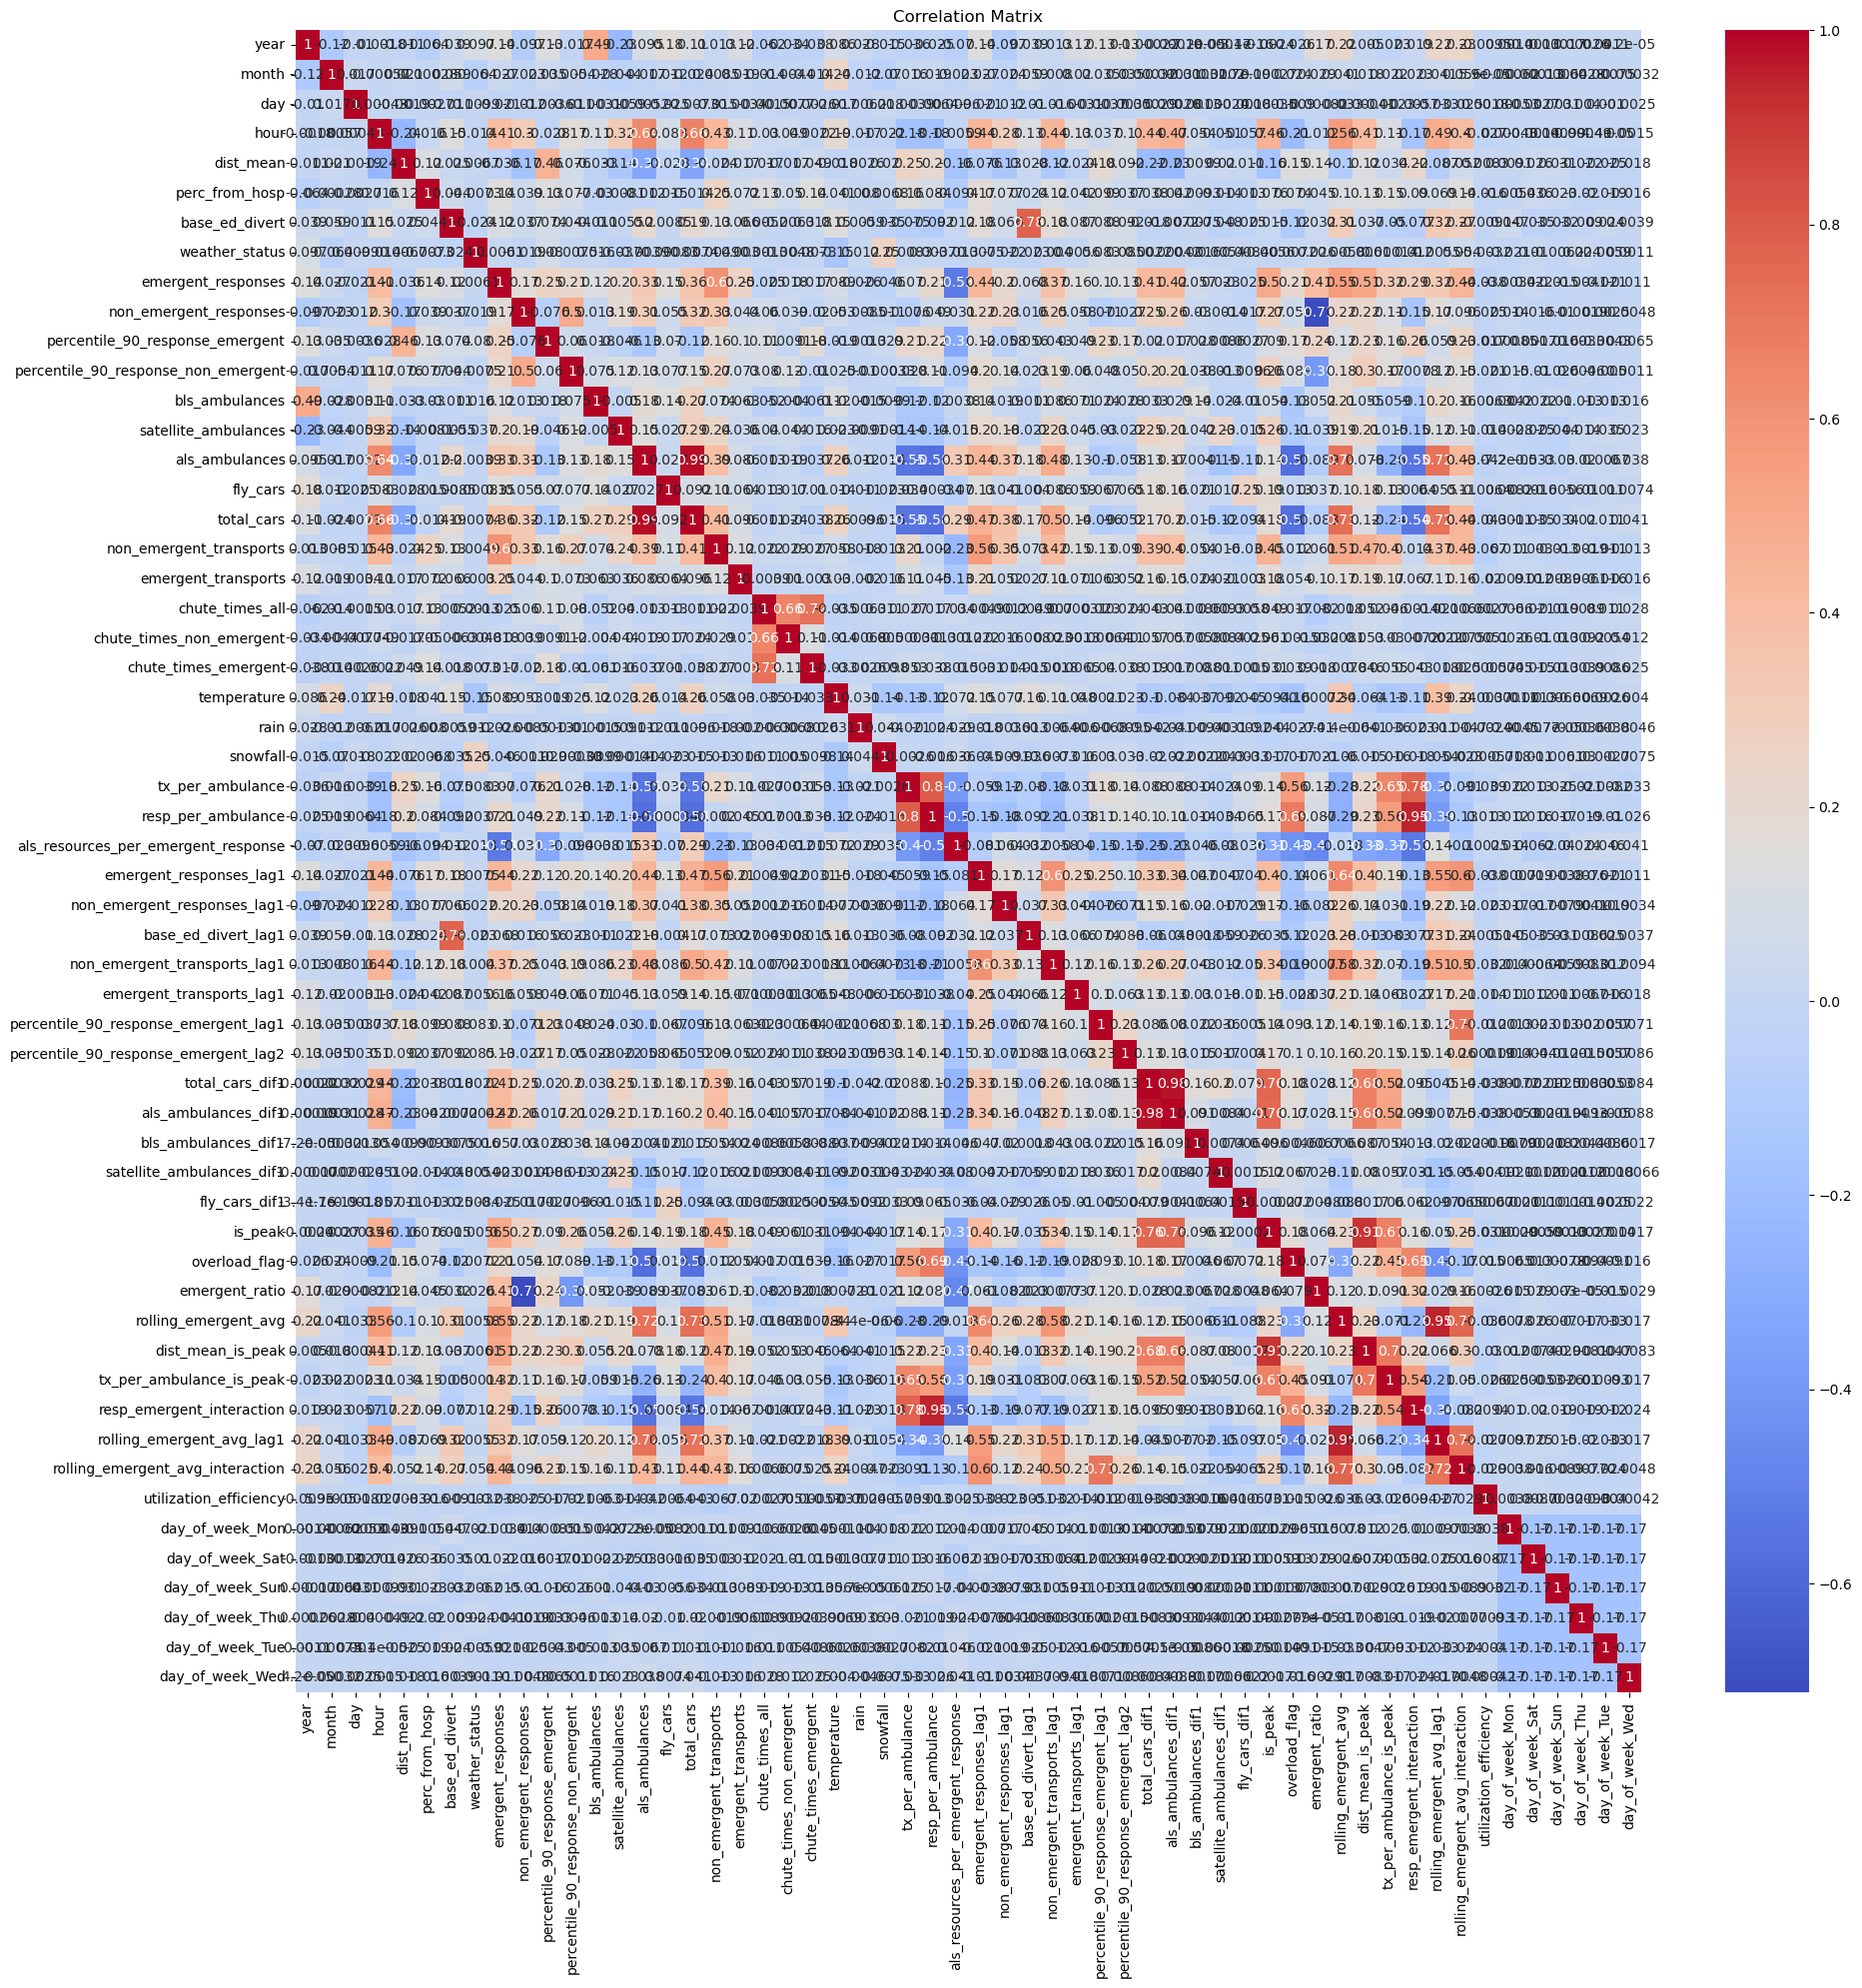

In [111]:
# Creating and visualizing a correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [112]:
# Correlation matrix is huge, let's parse it down
target_variable = 'percentile_90_response_emergent'

# Calculate correlations with the target variable
correlations = data.corr()[target_variable]

# Filter features with absolute correlation greater than 0.1
significant_features = correlations[correlations.abs() > 0.1]

# Order by absolute value of the correlations
significant_features = significant_features.reindex(
    significant_features.abs().sort_values(ascending=False).index
)

# Print the results
print("Features with |correlation| > 0.1 with the target, ordered by correlation strength:")
print(significant_features)

Features with |correlation| > 0.1 with the target, ordered by correlation strength:
percentile_90_response_emergent         1.000000
dist_mean                               0.456259
als_resources_per_emergent_response    -0.318765
resp_emergent_interaction               0.259075
emergent_responses                      0.252853
emergent_ratio                          0.238311
percentile_90_response_emergent_lag1    0.231315
rolling_emergent_avg_interaction        0.231216
dist_mean_is_peak                       0.230259
resp_per_ambulance                      0.217054
tx_per_ambulance                        0.214326
chute_times_emergent                    0.178529
overload_flag                           0.169778
percentile_90_response_emergent_lag2    0.168347
non_emergent_transports                 0.164000
tx_per_ambulance_is_peak                0.161202
year                                    0.132169
als_ambulances                         -0.130587
perc_from_hosp                    

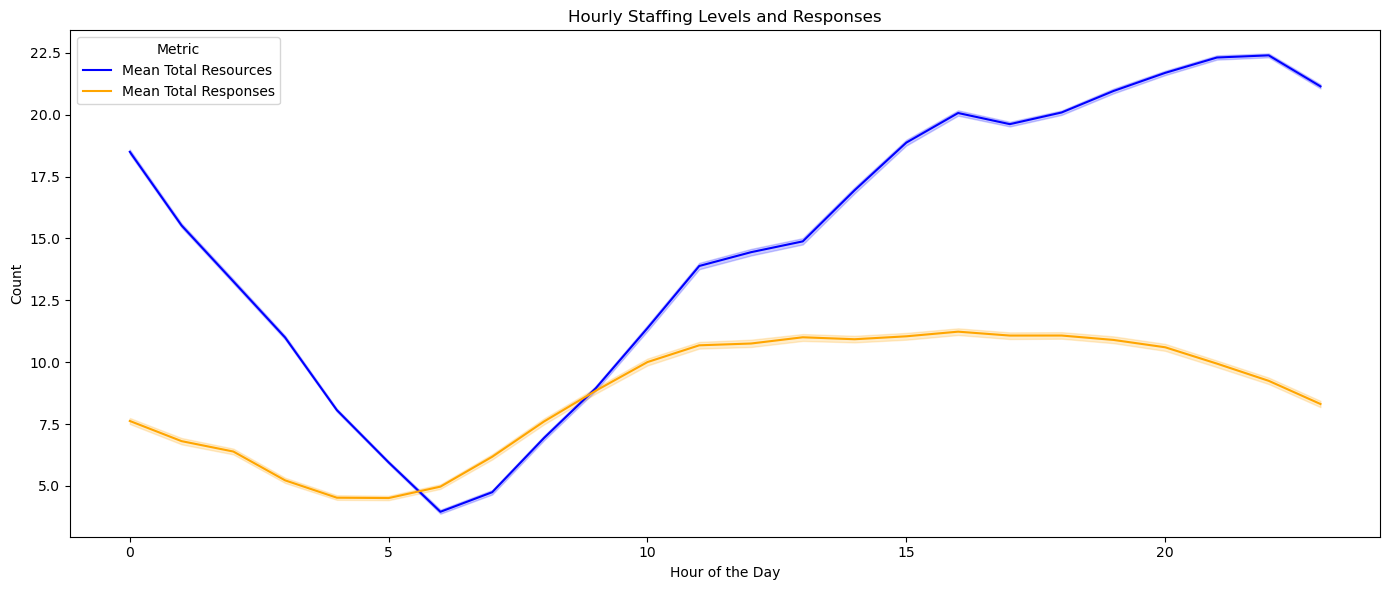

In [113]:
# First I want to inspect the obvious, is the agency making attempts to correctly staff for call volume?

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot hourly staffing levels
sns.lineplot(data=data, x='hour', y='total_cars', label='Mean Total Resources', color='blue', ax=ax)

# Plot hourly responses
sns.lineplot(data=data, x="hour", y=(data['non_emergent_transports'] + data['emergent_transports']), label='Mean Total Responses', color='orange', ax=ax)

# Add title and axis labels
ax.set_title("Hourly Staffing Levels and Responses")
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Count")
ax.legend(title="Metric")

# Display the plot
plt.tight_layout()
plt.show()

Count of <= 540: 30729
Count of > 540: 20801


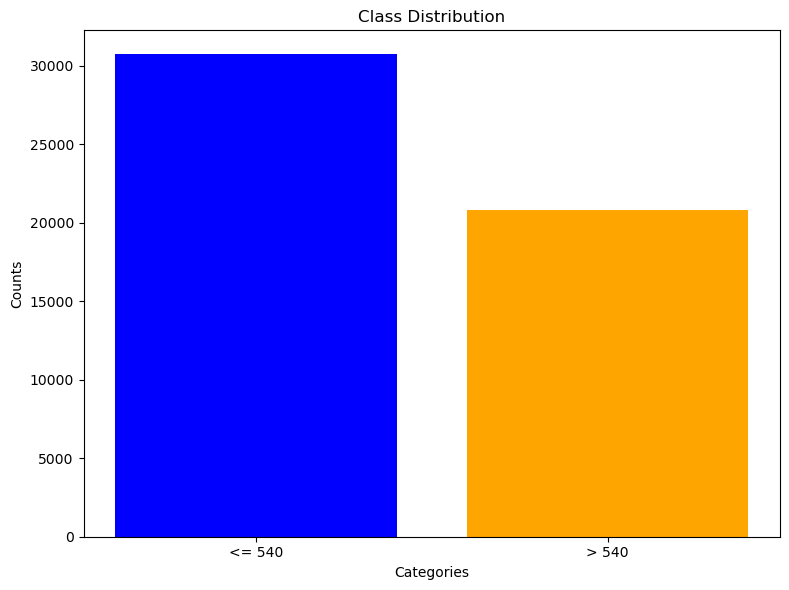

In [114]:
# Calculate counts
less_equal_540 = (data['percentile_90_response_emergent'] <= 540).sum()
greater_540 = (data['percentile_90_response_emergent'] > 540).sum()

# Print counts
print(f"Count of <= 540: {less_equal_540}")
print(f"Count of > 540: {greater_540}")

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['<= 540', '> 540'], [less_equal_540, greater_540], color=['blue', 'orange'])
ax.set_title("Class Distribution")
ax.set_xlabel("Categories")
ax.set_ylabel("Counts")
plt.tight_layout()
plt.show()

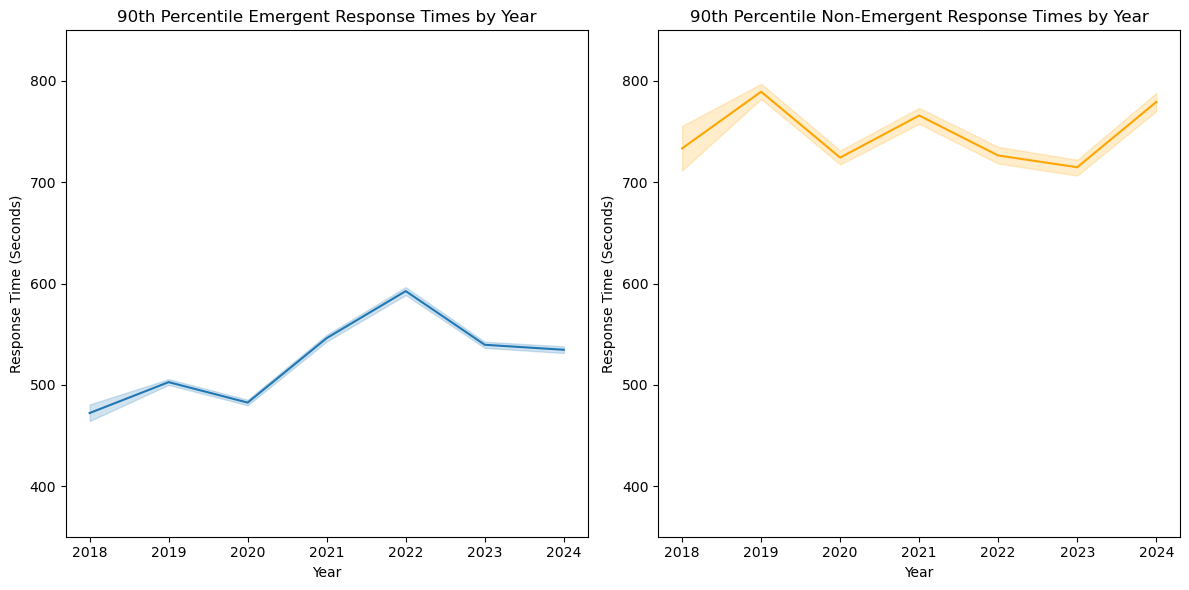

In [115]:
# Response Times for Emergent and Non-Emergent calls.

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First plot: 90th Percentile Emergent Response Times
sns.lineplot(data=data, x="year", y="percentile_90_response_emergent", ax=axes[0])
axes[0].set_title("90th Percentile Emergent Response Times by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Response Time (Seconds)")
axes[0].set_ylim(350, 850)  # Hardcoded y-axis range

# Second plot: 90th Percentile Non-Emergent Response Times
sns.lineplot(data=data, x="year", y="percentile_90_response_non_emergent", ax=axes[1], color='orange')
axes[1].set_title("90th Percentile Non-Emergent Response Times by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Response Time (Seconds)")
axes[1].set_ylim(350, 850)  # Hardcoded y-axis range

# Adjust layout
plt.tight_layout()
plt.show()

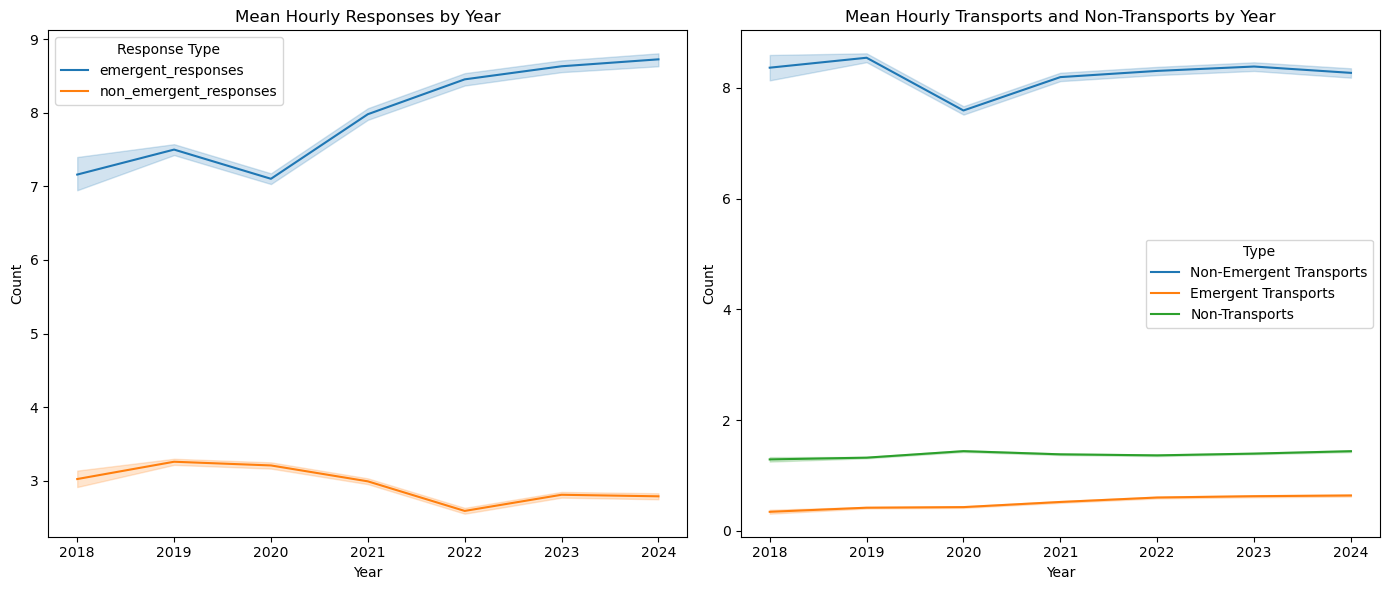

In [116]:
# Next we look at responses and transports

# Create the melted dataframe for the first chart
responses_melted = data.melt(
    id_vars='year',
    value_vars=['emergent_responses', 'non_emergent_responses'],
    var_name='Response Type',
    value_name='Count'
)

# Calculate "Transports" and "Non-Transports" for the second chart
data['Transports'] = data['non_emergent_transports'] + data['emergent_transports']

# Avoid division by zero
data['Non-Transports'] = np.where(
    data['Transports'] == 0,  # Check where Transports is zero
    0,  # Set Non-Transports to 0 if Transports is zero
    (data['emergent_responses'] + data['non_emergent_responses']) / data['Transports']  # Perform the division otherwise
)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Emergent and Non-Emergent Responses
sns.lineplot(data=responses_melted, x="year", y="Count", hue="Response Type", ax=axes[0])
axes[0].set_title("Mean Hourly Responses by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")
axes[0].legend(title="Response Type")

# Second plot: Transports vs Non-Transports
sns.lineplot(data=data, x="year", y="non_emergent_transports", label="Non-Emergent Transports", ax=axes[1])
sns.lineplot(data=data, x="year", y="emergent_transports", label="Emergent Transports", ax=axes[1])
sns.lineplot(data=data, x="year", y="Non-Transports", label="Non-Transports", ax=axes[1])
axes[1].set_title("Mean Hourly Transports and Non-Transports by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")
axes[1].legend(title="Type")

# Adjust layout
plt.tight_layout()
plt.show()

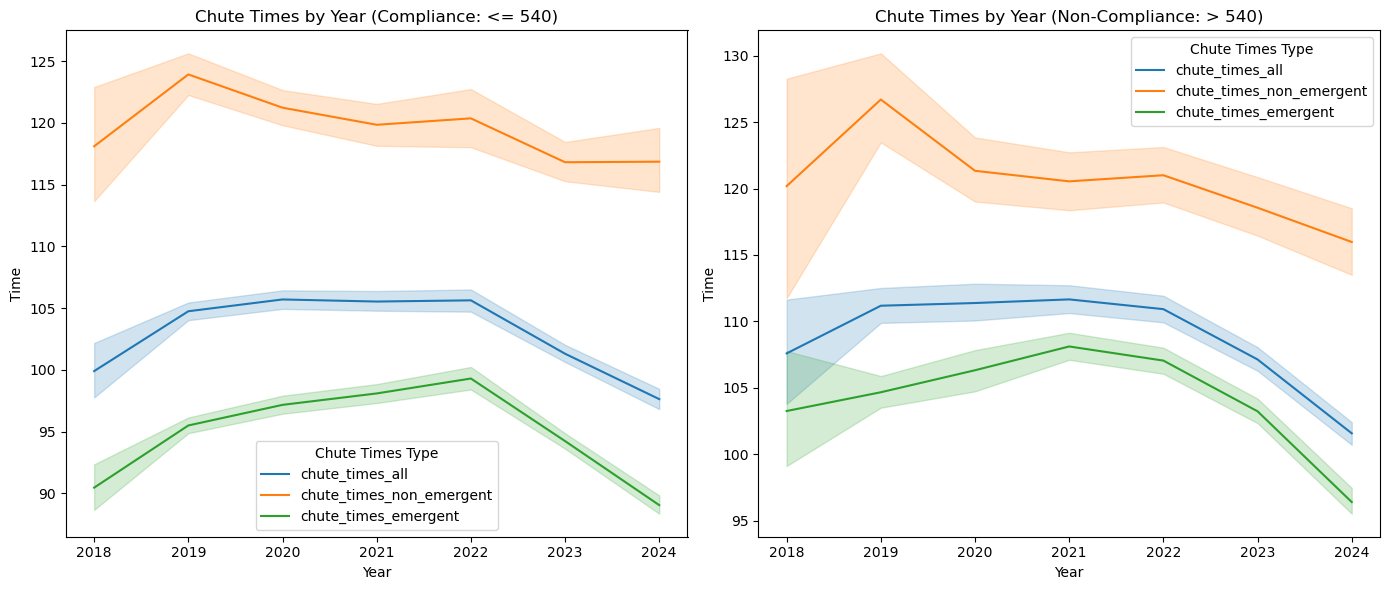

In [117]:
# Create a compliance column: 1 for <= 540, 0 for > 540
data['compliance'] = (data['percentile_90_response_emergent'] <= 540).astype(int)

# Melt the data for "Chute Times" plot, keeping compliance as part of the melted data
chutes_melted = data.melt(
    id_vars=['year', 'compliance'],
    value_vars=['chute_times_all', 'chute_times_non_emergent', 'chute_times_emergent'],
    var_name='Chute Times',
    value_name='Time'
)

# Separate the data into two groups for plotting
chutes_compliant = chutes_melted[chutes_melted['compliance'] == 1]
chutes_non_compliant = chutes_melted[chutes_melted['compliance'] == 0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left chart: Chute times for compliant (<= 540)
sns.lineplot(data=chutes_compliant, x="year", y="Time", hue="Chute Times", ax=axes[0])
axes[0].set_title("Chute Times by Year (Compliance: <= 540)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Time")
axes[0].legend(title="Chute Times Type")

# Right chart: Chute times for non-compliant (> 540)
sns.lineplot(data=chutes_non_compliant, x="year", y="Time", hue="Chute Times", ax=axes[1])
axes[1].set_title("Chute Times by Year (Non-Compliance: > 540)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Time")
axes[1].legend(title="Chute Times Type")

# Adjust layout
plt.tight_layout()
plt.show()

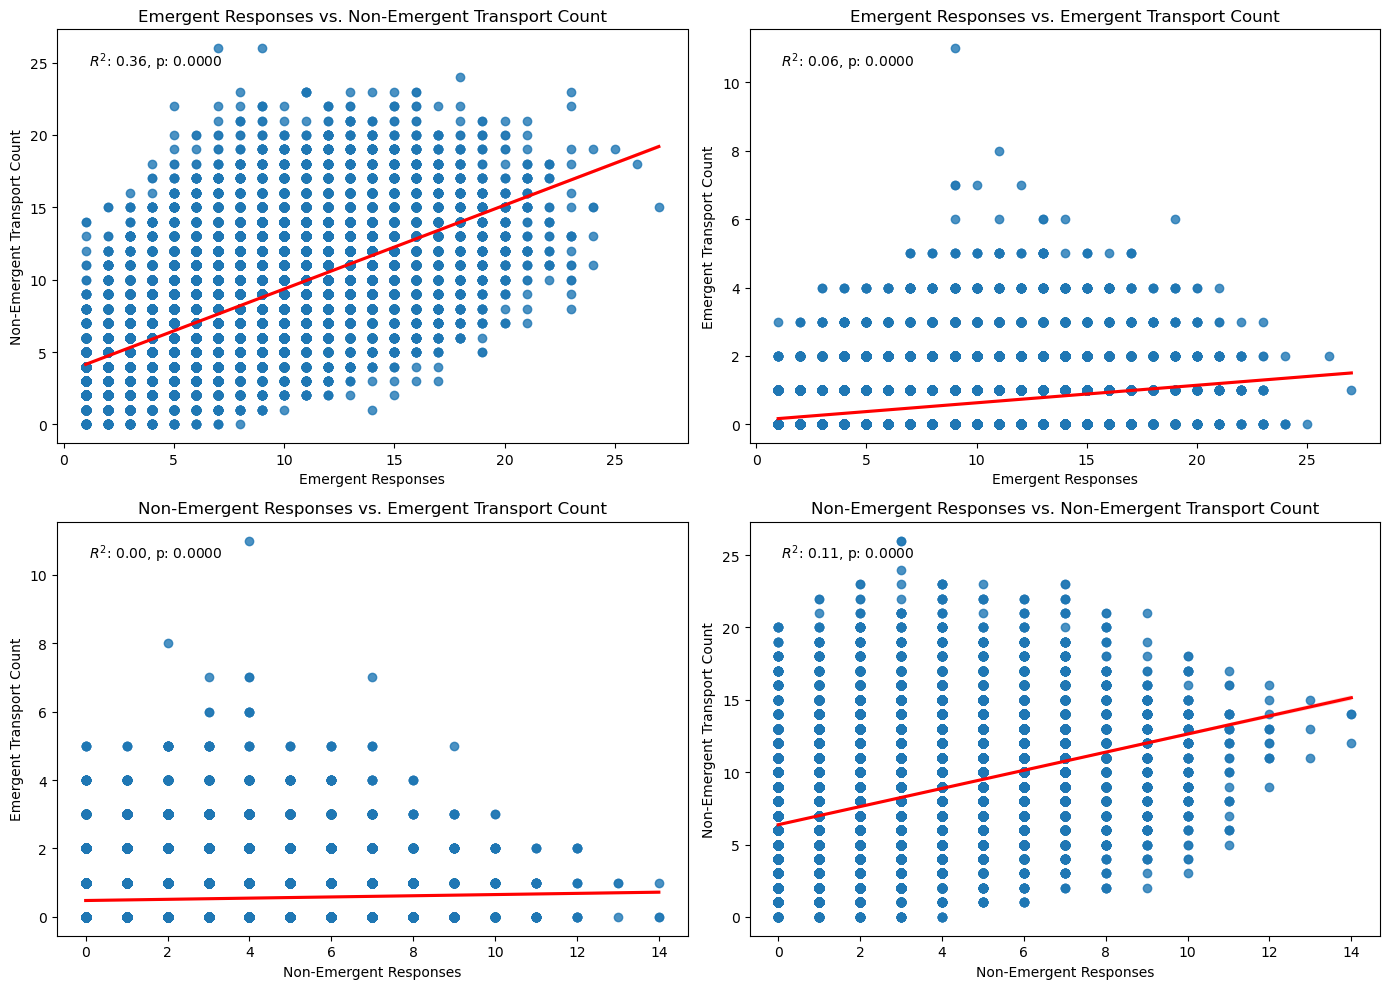

In [118]:
# Helper function to perform regression analysis
def regression_analysis(x, y):
    x = sm.add_constant(x)  # Add constant term for the intercept
    model = sm.OLS(y, x).fit()
    return model

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Emergent Responses vs. Non-Emergent Transports
sns.regplot(data=data, x='emergent_responses', y='non_emergent_transports', line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title("Emergent Responses vs. Non-Emergent Transport Count")
axes[0, 0].set_xlabel("Emergent Responses")
axes[0, 0].set_ylabel("Non-Emergent Transport Count")

# Perform regression and display R^2 and p-value
x = data['emergent_responses'].dropna()
y = data['non_emergent_transports'].dropna()
model = regression_analysis(x, y)
axes[0, 0].text(0.05, 0.95, f"$R^2$: {model.rsquared:.2f}, p: {model.pvalues.iloc[1]:.4f}",
                transform=axes[0, 0].transAxes, fontsize=10, verticalalignment='top')

# 2. Emergent Responses vs. Emergent Transports
sns.regplot(data=data, x='emergent_responses', y='emergent_transports', line_kws={'color': 'red'}, ax=axes[0, 1])
axes[0, 1].set_title("Emergent Responses vs. Emergent Transport Count")
axes[0, 1].set_xlabel("Emergent Responses")
axes[0, 1].set_ylabel("Emergent Transport Count")

x = data['emergent_responses'].dropna()
y = data['emergent_transports'].dropna()
model = regression_analysis(x, y)
axes[0, 1].text(0.05, 0.95, f"$R^2$: {model.rsquared:.2f}, p: {model.pvalues.iloc[1]:.4f}",
                transform=axes[0, 1].transAxes, fontsize=10, verticalalignment='top')

# 3. Non-Emergent Responses vs. Emergent Transports
sns.regplot(data=data, x='non_emergent_responses', y='emergent_transports', line_kws={'color': 'red'}, ax=axes[1, 0])
axes[1, 0].set_title("Non-Emergent Responses vs. Emergent Transport Count")
axes[1, 0].set_xlabel("Non-Emergent Responses")
axes[1, 0].set_ylabel("Emergent Transport Count")

x = data['non_emergent_responses'].dropna()
y = data['emergent_transports'].dropna()
model = regression_analysis(x, y)
axes[1, 0].text(0.05, 0.95, f"$R^2$: {model.rsquared:.2f}, p: {model.pvalues.iloc[1]:.4f}",
                transform=axes[1, 0].transAxes, fontsize=10, verticalalignment='top')

# 4. Non-Emergent Responses vs. Non-Emergent Transports
sns.regplot(data=data, x='non_emergent_responses', y='non_emergent_transports', line_kws={'color': 'red'}, ax=axes[1, 1])
axes[1, 1].set_title("Non-Emergent Responses vs. Non-Emergent Transport Count")
axes[1, 1].set_xlabel("Non-Emergent Responses")
axes[1, 1].set_ylabel("Non-Emergent Transport Count")

x = data['non_emergent_responses'].dropna()
y = data['non_emergent_transports'].dropna()
model = regression_analysis(x, y)
axes[1, 1].text(0.05, 0.95, f"$R^2$: {model.rsquared:.2f}, p: {model.pvalues.iloc[1]:.4f}",
                transform=axes[1, 1].transAxes, fontsize=10, verticalalignment='top')

# Adjust layout
plt.tight_layout()
plt.show()

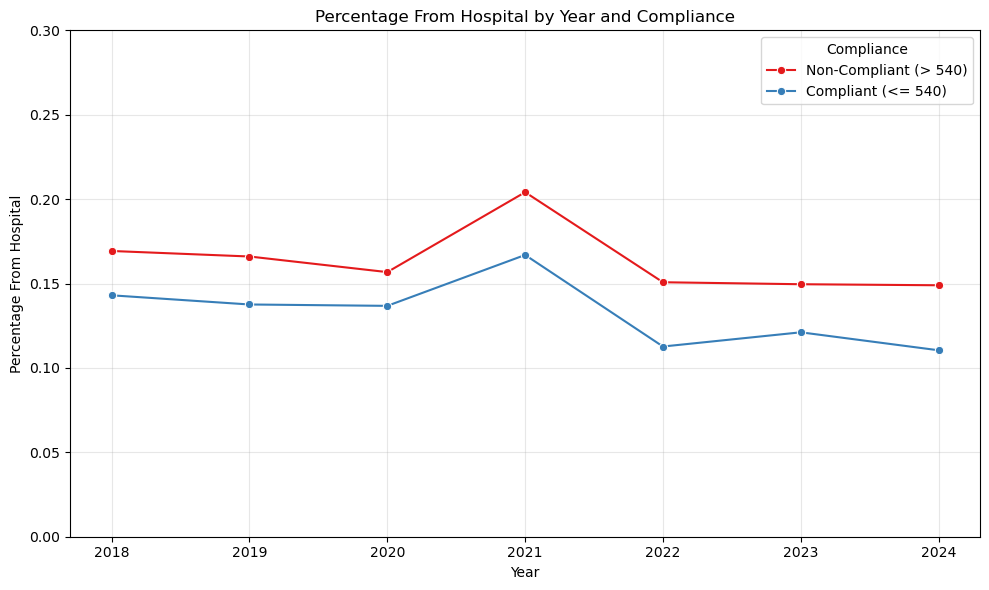

In [119]:
# perc_from_hosp

# Group the data by year and compliance, calculating the mean `perc_from_hosp`
perc_from_hosp_summary = data.groupby(['year', 'compliance'])['perc_from_hosp'].mean().reset_index()

# Map compliance values to labels
perc_from_hosp_summary['compliance'] = perc_from_hosp_summary['compliance'].map({1: 'Compliant (<= 540)', 0: 'Non-Compliant (> 540)'})

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=perc_from_hosp_summary,
    x='year',
    y='perc_from_hosp',
    hue='compliance',
    marker='o',
    palette='Set1'
)
plt.title('Percentage From Hospital by Year and Compliance')
plt.xlabel('Year')
plt.ylabel('Percentage From Hospital')
plt.ylim(0, 0.3)
plt.legend(title='Compliance')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

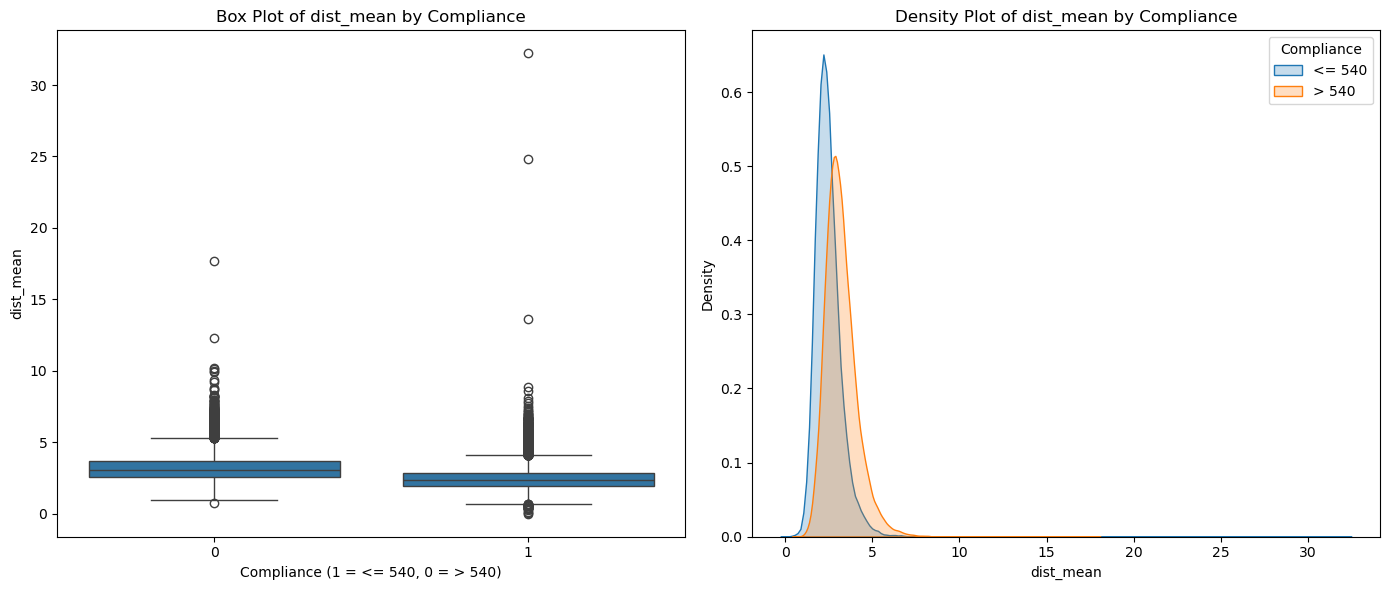

In [120]:
# Box Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for `dist_mean` by target
sns.boxplot(x='compliance', y='dist_mean', data=data, ax=ax[0])
ax[0].set_title("Box Plot of dist_mean by Compliance")
ax[0].set_xlabel("Compliance (1 = <= 540, 0 = > 540)")
ax[0].set_ylabel("dist_mean")

# Density Plot
sns.kdeplot(data[data['compliance'] == 1]['dist_mean'], label="<= 540", ax=ax[1], fill=True)
sns.kdeplot(data[data['compliance'] == 0]['dist_mean'], label="> 540", ax=ax[1], fill=True)
ax[1].set_title("Density Plot of dist_mean by Compliance")
ax[1].set_xlabel("dist_mean")
ax[1].set_ylabel("Density")
ax[1].legend(title="Compliance")

plt.tight_layout()
plt.show()

## Modeling

### Overview

The modeling phase aimed to identify and predict factors influencing Response Time Compliance (RTC), defined as achieving a response time of 540 seconds or less. The focus was on building interpretable models to classify incidents as compliant (`1`) or non-compliant (`0`), evaluate model performance, and gain insights into feature importance.

---

### Steps and Techniques

#### 1. **Defining Features and Target**
   - **Objective**: Prepare the dataset for modeling by selecting relevant features and defining the target variable.
   - **Target Variable**: Binary classification of RTC (`1` for compliant, `0` for non-compliant).
   - **Features**: Included engineered features such as `dist_mean`, `tx_per_ambulance`, and `rolling_emergent_avg_interaction`.

#### 2. **Train-Test Split**
   - **Objective**: Split the data into training and testing subsets to ensure robust model evaluation.
   - **Technique**: Stratified split with an 80/20 ratio, maintaining the distribution of compliance classes in both sets.

#### 3. **Baseline Model**
   - **Model**: Logistic Regression
   - **Objective**: Establish a baseline for comparison with more complex models.
   - **Key Steps**:
     - Applied **StandardScaler** to normalize features.
     - Used `class_weight='balanced'` to handle class imbalance.
   - **Results**:
     - Achieved moderate F1 scores, highlighting the importance of feature selection and hyperparameter tuning.

#### 4. **Feature Selection and Importance**
   - **Objective**: Identify the most important features influencing RTC.
   - **Techniques**:
     - Evaluated coefficients from the logistic regression model.
     - Compared feature importance from the Decision Tree classifier.
   - **Insights**:
     - `dist_mean`, `als_resources_per_emergent_response`, and `chute_times_emergent` emerged as critical predictors of compliance.

#### 5. **Hyperparameter Tuning**
   - **Objective**: Optimize model performance by tuning hyperparameters.
   - **Technique**: GridSearchCV
     - **Logistic Regression**:
       - Tuned `C` (regularization strength), solver, and class weights.
       - Focused on F1 score optimization.
     - **Decision Tree**:
       - Tuned `max_depth`, `min_samples_split`, `min_samples_leaf`, and splitting criterion.
       - Balanced interpretability and predictive power.
   - **Results**:
     - Logistic Regression: Best parameters achieved an F1 score of 0.80.
     - Decision Tree: Tuned model achieved an F1 score of 0.78.

#### 6. **Threshold Tuning**
   - **Objective**: Optimize decision thresholds for the logistic regression model to maximize F1 score.
   - **Technique**:
     - Evaluated thresholds in the range [0.1, 0.9] for classification probabilities.
     - Selected a threshold of `0.45` for the best F1 score.
   - **Results**:
     - Improved balance between precision and recall, with noticeable gains in identifying compliant incidents.

#### 7. **Cross-Validation**
   - **Objective**: Assess model generalizability using cross-validation.
   - **Technique**:
     - Performed 5-fold cross-validation for both logistic regression and decision tree models.
   - **Results**:
     - Logistic Regression: Mean CV F1 score of 0.7947.
     - Decision Tree: Mean CV F1 score of 0.7823.
   - **Insights**:
     - Both models showed consistent performance across folds, indicating robustness.

---

### Model Comparison

| Metric               | Logistic Regression | Decision Tree |
|----------------------|---------------------|---------------|
| **F1 Score**         | 0.80               | 0.78          |
| **Precision (Class 1)** | High              | Moderate      |
| **Recall (Class 1)** | High               | Moderate      |
| **Cross-Validation** | Stable             | Slightly lower|

- Logistic Regression outperformed the Decision Tree in terms of F1 score and stability, making it the preferred model for this analysis.

---

### Tools and Techniques

1. **Libraries Used**:
   - **Scikit-learn** for model development, evaluation, and hyperparameter tuning.
   - **Matplotlib** and **Seaborn** for visualizing results (e.g., confusion matrices, feature importance).
   - **Statsmodels** for detailed regression analysis.

2. **Evaluation Metrics**:
   - **F1 Score**: Prioritized for imbalanced classes to balance precision and recall.
   - **Confusion Matrix**: Visualized performance across classes.
   - **Cross-Validation**: Ensured robust generalizability.

---

### Summary

The modeling phase successfully identified factors influencing RTC compliance and demonstrated the predictive capabilities of both logistic regression and decision tree models. The logistic regression model, with its high interpretability and strong performance, emerged as the preferred choice for future deployment. Threshold tuning and feature importance analysis provided actionable insights, enhancing both the model's accuracy and its relevance to operational decision-making.


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      4160
           1       0.75      0.72      0.74      6146

    accuracy                           0.69     10306
   macro avg       0.68      0.68      0.68     10306
weighted avg       0.69      0.69      0.69     10306

F1 Score: 0.74


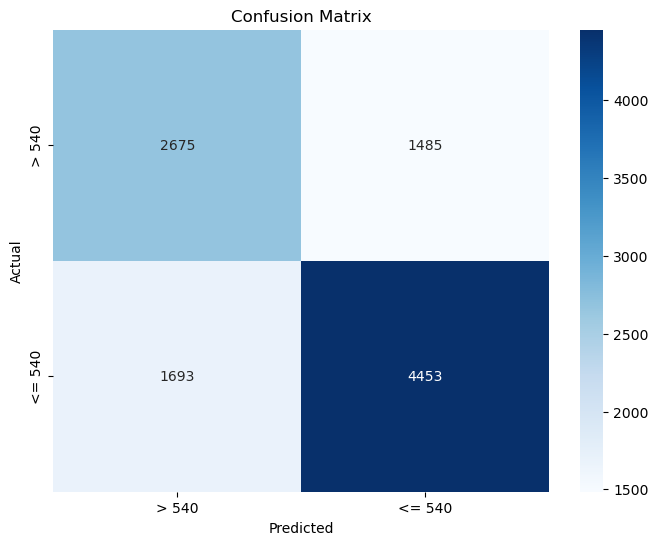

In [121]:
# Define feature and target
X = data[['dist_mean']]  # Feature(s)
y = (data['percentile_90_response_emergent'] <= 540).astype(int)  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features
    ('logreg', LogisticRegression(random_state=42, class_weight='balanced'))  # Step 2: Logistic Regression
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['> 540', '<= 540'], yticklabels=['> 540', '<= 540'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4160
           1       0.80      0.74      0.77      6146

    accuracy                           0.74     10306
   macro avg       0.73      0.73      0.73     10306
weighted avg       0.74      0.74      0.74     10306

F1 Score: 0.77


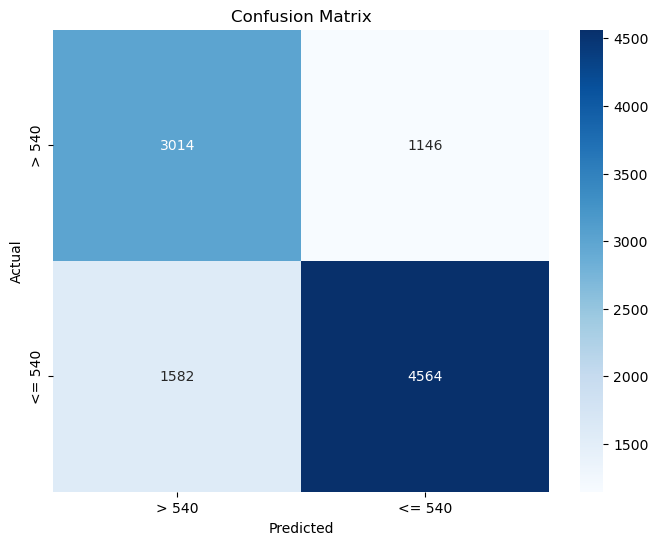

In [122]:
# Drop the target column to define features
X = data.drop(columns=['percentile_90_response_emergent', 'compliance', 'year'])  # Features
y = (data['percentile_90_response_emergent'] <= 540).astype(int)  # Target

# Handle missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)  # Convert infinities to NaN
X = X.fillna(X.median())  # Impute missing values with median

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features
    ('logreg', LogisticRegression(random_state=42, class_weight='balanced'))  # Step 2: Logistic Regression
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['> 540', '<= 540'], yticklabels=['> 540', '<= 540'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [123]:
feature_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': pipeline.named_steps['logreg'].coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_coeffs)


                                 Feature  Coefficient
3                              dist_mean    -0.892132
42                     dist_mean_is_peak    -0.467774
44             resp_emergent_interaction    -0.428207
46      rolling_emergent_avg_interaction    -0.370582
25   als_resources_per_emergent_response     0.353125
38                               is_peak     0.321843
19                  chute_times_emergent    -0.284801
24                    resp_per_ambulance     0.222909
7                     emergent_responses    -0.193629
41                  rolling_emergent_avg     0.151127
23                      tx_per_ambulance     0.141639
45             rolling_emergent_avg_lag1    -0.134769
17                       chute_times_all    -0.120756
6                         weather_status    -0.113361
2                                   hour     0.105413
13                              fly_cars    -0.079901
50                       day_of_week_Sun     0.077309
54                          

In [124]:
# List of features with |correlation| > 0.1
selected_features = [
    'dist_mean', 'als_resources_per_emergent_response', 'resp_emergent_interaction',
    'emergent_responses', 'emergent_ratio', 'percentile_90_response_emergent_lag1',
    'rolling_emergent_avg_interaction', 'dist_mean_is_peak', 'resp_per_ambulance',
    'tx_per_ambulance', 'chute_times_emergent', 'overload_flag',
    'percentile_90_response_emergent_lag2', 'non_emergent_transports',
    'tx_per_ambulance_is_peak', 'als_ambulances', 'perc_from_hosp',
    'total_cars', 'emergent_responses_lag1', 'rolling_emergent_avg',
    'chute_times_all', 'emergent_transports'
]

X_reduced = data[selected_features]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      4160
           1       0.80      0.74      0.76      6146

    accuracy                           0.73     10306
   macro avg       0.72      0.73      0.72     10306
weighted avg       0.74      0.73      0.73     10306

F1 Score: 0.76


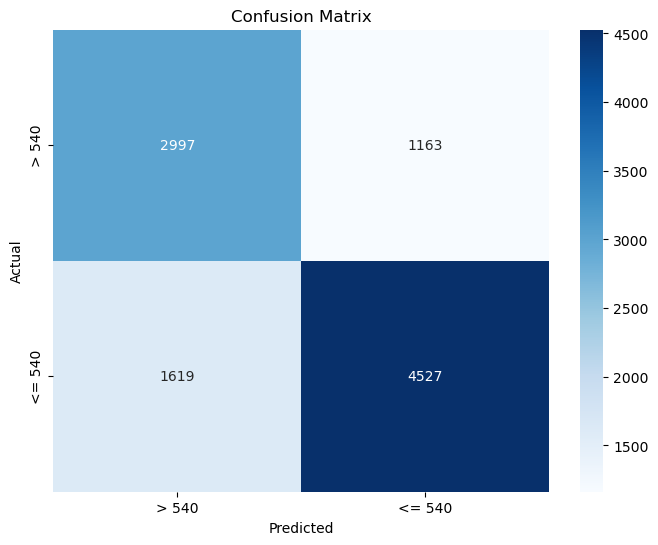

In [125]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features
    ('logreg', LogisticRegression(random_state=42, class_weight='balanced'))  # Step 2: Logistic Regression
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['> 540', '<= 540'], yticklabels=['> 540', '<= 540'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'logreg__C': 0.001, 'logreg__class_weight': {0: 1, 1: 1}, 'logreg__solver': 'lbfgs'}
Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      4160
           1       0.75      0.85      0.80      6146

    accuracy                           0.74     10306
   macro avg       0.74      0.72      0.72     10306
weighted avg       0.74      0.74      0.74     10306

Best Threshold for F1 Score: 0.45
Best F1 Score: 0.8000
Classification Report at Best F1 Threshold:
              precision    recall  f1-score   support

           0       0.75      0.52      0.61      4160
           1       0.73      0.89      0.80      6146

    accuracy                           0.74     10306
   macro avg       0.74      0.70      0.71     10306
weighted avg       0.74      0.74      0.72     10306



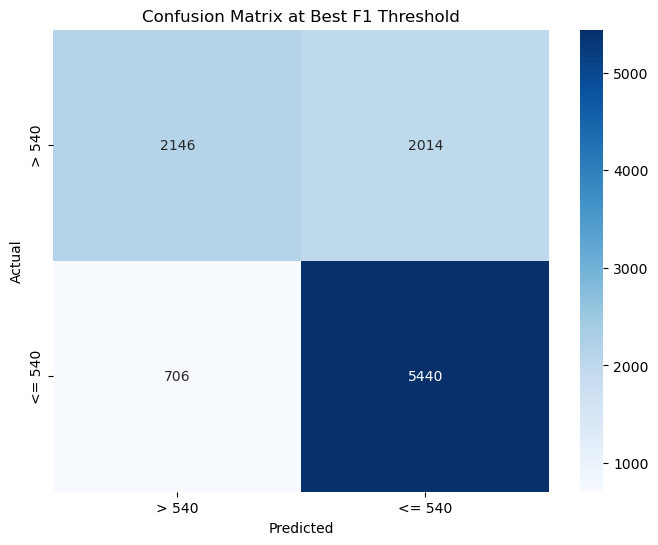

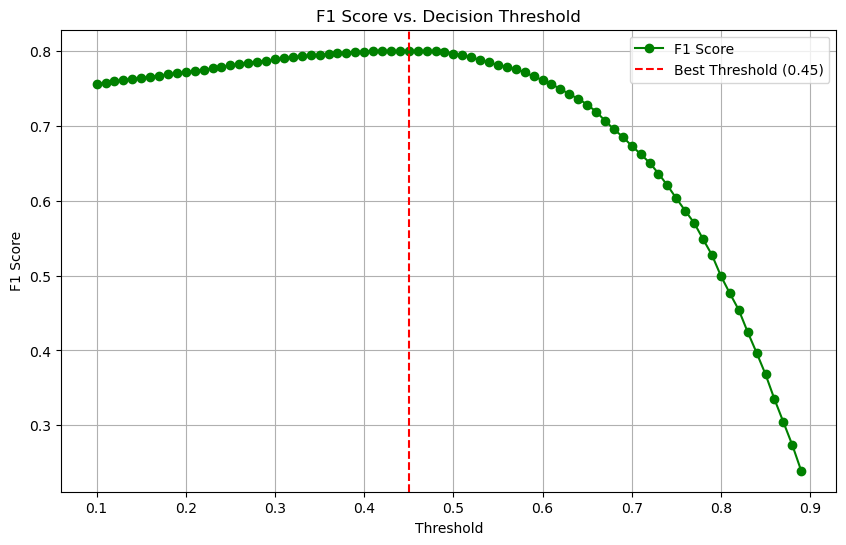

In [126]:
# Define parameter grid for class weights
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs', 'saga'],
    'logreg__class_weight': [
        {0: 1, 1: 0.8}, 
        {0: 1, 1: 1}, 
        {0: 2, 1: 1}, 
        {0: 3, 1: 1}, 
        'balanced'
    ]
}

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000, random_state=42))
])

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',  # Use F1 score for optimization
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
y_prob = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for threshold tuning
y_pred_default = best_model.predict(X_test)  # Default predictions at 0.5 threshold

# Default threshold evaluation
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred_default))

# F1-Focused Threshold Tuning
thresholds = np.arange(0.1, 0.9, 0.01)  # Wider range for finding the best F1 score
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Find the best threshold for F1 Score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print(f"Best Threshold for F1 Score: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1_score:.4f}")

# Evaluate at the best F1 threshold
y_pred_best_thresh = (y_prob >= best_threshold).astype(int)
print("Classification Report at Best F1 Threshold:")
print(classification_report(y_test, y_pred_best_thresh))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_thresh)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['> 540', '<= 540'], yticklabels=['> 540', '<= 540'])
plt.title("Confusion Matrix at Best F1 Threshold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot F1 Score vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o', color='green')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Best Threshold ({best_threshold:.2f})")
plt.title("F1 Score vs. Decision Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.show()

In [127]:
# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# Save the best model
model_path = 'models/logreg_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to '{model_path}'")

Best model saved to 'models/logreg_model.pkl'


Classification Report (Baseline Decision Tree):
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      4160
           1       0.71      0.70      0.71      6146

    accuracy                           0.65     10306
   macro avg       0.64      0.64      0.64     10306
weighted avg       0.65      0.65      0.65     10306

F1 Score: 0.71


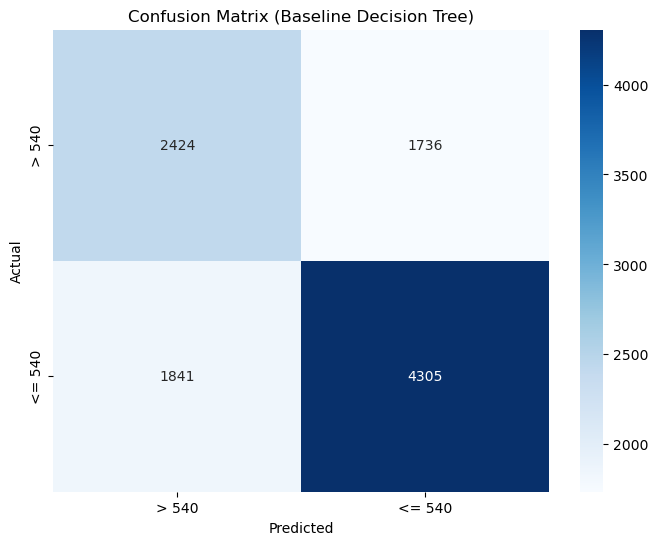

In [128]:
# I want to compare against a DecisionTreeClassifier

# Baseline Decision Tree Classifier
baseline_dtree = DecisionTreeClassifier(random_state=42)  # Default hyperparameters

# Fit the baseline model to the training data
baseline_dtree.fit(X_train, y_train)

# Predict using default threshold (0.5)
y_pred_baseline = baseline_dtree.predict(X_test)

# Evaluate baseline model performance
print("Classification Report (Baseline Decision Tree):")
print(classification_report(y_test, y_pred_baseline))

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred_baseline)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['> 540', '<= 540'], yticklabels=['> 540', '<= 540'])
plt.title("Confusion Matrix (Baseline Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters (Decision Tree): {'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report (Tuned Decision Tree):
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      4160
           1       0.75      0.81      0.78      6146

    accuracy                           0.72     10306
   macro avg       0.71      0.70      0.70     10306
weighted avg       0.72      0.72      0.72     10306

F1 Score: 0.78


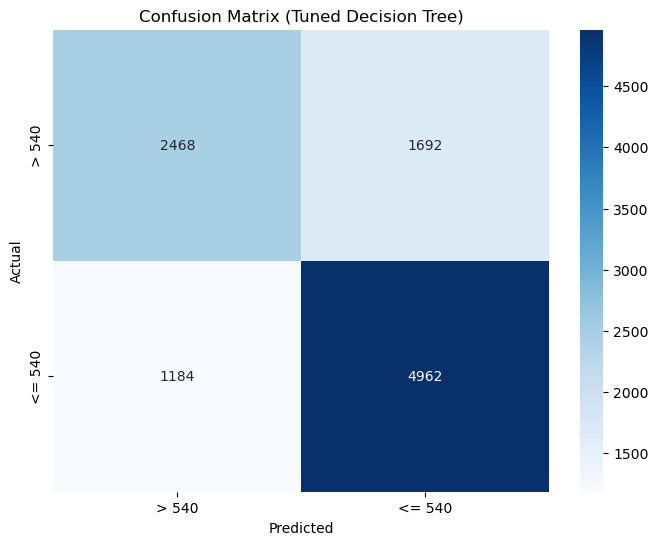

In [129]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Vary tree depth
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],     # Minimum samples required in a leaf node
    'class_weight': [None, 'balanced'],  # Handle class imbalance
    'criterion': ['gini', 'entropy']   # Splitting criteria
}

# Decision Tree Classifier with GridSearchCV
dtree = DecisionTreeClassifier(random_state=42)
grid_search_dtree = GridSearchCV(
    dtree, 
    param_grid, 
    scoring='f1',  # Optimize for F1 score
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_dtree.fit(X_train, y_train)

# Best parameters and model
best_dtree = grid_search_dtree.best_estimator_
print("Best Parameters (Decision Tree):", grid_search_dtree.best_params_)

# Predict using the tuned model
y_pred_tuned = best_dtree.predict(X_test)

# Evaluate tuned model performance
print("Classification Report (Tuned Decision Tree):")
print(classification_report(y_test, y_pred_tuned))

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred_tuned)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['> 540', '<= 540'], yticklabels=['> 540', '<= 540'])
plt.title("Confusion Matrix (Tuned Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [130]:
# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# Save the decision tree classifier model
dtc_model_path = 'models/dtc_model.pkl'
with open(dtc_model_path, 'wb') as file:
    pickle.dump(best_dtree, file)
print(f"Decision Tree Classifier model saved to '{dtc_model_path}'")

Decision Tree Classifier model saved to 'models/dtc_model.pkl'


In [131]:
# Cross-validation setup for Logistic Regression and Decision Tree
from sklearn.model_selection import cross_val_score
import numpy as np

# Logistic Regression Cross-Validation
logreg_cv_scores = cross_val_score(
    best_model,  # Final Logistic Regression model
    X_train, 
    y_train, 
    cv=5,  # 5-fold cross-validation
    scoring='f1'  # Evaluate using F1 score
)

logreg_mean = logreg_cv_scores.mean()
logreg_std = logreg_cv_scores.std()
print("Logistic Regression CV F1 Scores:", logreg_cv_scores)
print("Logistic Regression Mean CV F1 Score:", logreg_mean)
print("Logistic Regression Std CV F1 Score:", logreg_std)

# Decision Tree Cross-Validation
dtree_cv_scores = cross_val_score(
    best_dtree,  # Final Decision Tree model
    X_train, 
    y_train, 
    cv=5,  # 5-fold cross-validation
    scoring='f1'  # Evaluate using F1 score
)

dtree_mean = dtree_cv_scores.mean()
dtree_std = dtree_cv_scores.std()
print("Decision Tree CV F1 Scores:", dtree_cv_scores)
print("Decision Tree Mean CV F1 Score:", dtree_mean)
print("Decision Tree Std CV F1 Score:", dtree_std)

# # Plotting the CV results for comparison
# plt.figure(figsize=(10, 6))
# x = ['LogReg Fold 1', 'LogReg Fold 2', 'LogReg Fold 3', 'LogReg Fold 4', 'LogReg Fold 5', 
#      'DTree Fold 1', 'DTree Fold 2', 'DTree Fold 3', 'DTree Fold 4', 'DTree Fold 5']
# y = list(logreg_cv_scores) + list(dtree_cv_scores)
# colors = ['green'] * 5 + ['blue'] * 5

# plt.bar(x, y, color=colors)
# plt.title("Cross-Validation F1 Scores for Logistic Regression and Decision Tree")
# plt.ylabel("F1 Score")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# Print summary comparison
print("\n === Summary of Cross-Validation Results: ===")
print(f"Logistic Regression - Mean F1 Score: {logreg_mean:.4f}, Std: {logreg_std:.4f}")
print(f"Decision Tree - Mean F1 Score: {dtree_mean:.4f}, Std: {dtree_std:.4f}")

Logistic Regression CV F1 Scores: [0.79568043 0.79586959 0.79629099 0.79562322 0.79016798]
Logistic Regression Mean CV F1 Score: 0.7947264390376118
Logistic Regression Std CV F1 Score: 0.00229122012298099
Decision Tree CV F1 Scores: [0.78054498 0.78966233 0.77792016 0.78026558 0.78300426]
Decision Tree Mean CV F1 Score: 0.7822794600729673
Decision Tree Std CV F1 Score: 0.004027399496617588

 === Summary of Cross-Validation Results: ===
Logistic Regression - Mean F1 Score: 0.7947, Std: 0.0023
Decision Tree - Mean F1 Score: 0.7823, Std: 0.0040


## Evaluation

                                 Feature  Abs_LogReg_Coeff  DTree_Importance
0                              dist_mean          0.805300          0.598595
10                  chute_times_emergent          0.265233          0.060784
1    als_resources_per_emergent_response          0.193175          0.123987
6       rolling_emergent_avg_interaction          0.182133          0.076254
3                     emergent_responses          0.175292          0.017471
4                         emergent_ratio          0.120078          0.007528
2              resp_emergent_interaction          0.112487          0.015658
7                      dist_mean_is_peak          0.111219          0.064898
19                  rolling_emergent_avg          0.100901          0.003286
13               non_emergent_transports          0.082653          0.000000
15                        als_ambulances          0.078340          0.002109
12  percentile_90_response_emergent_lag2          0.075246          0.003590

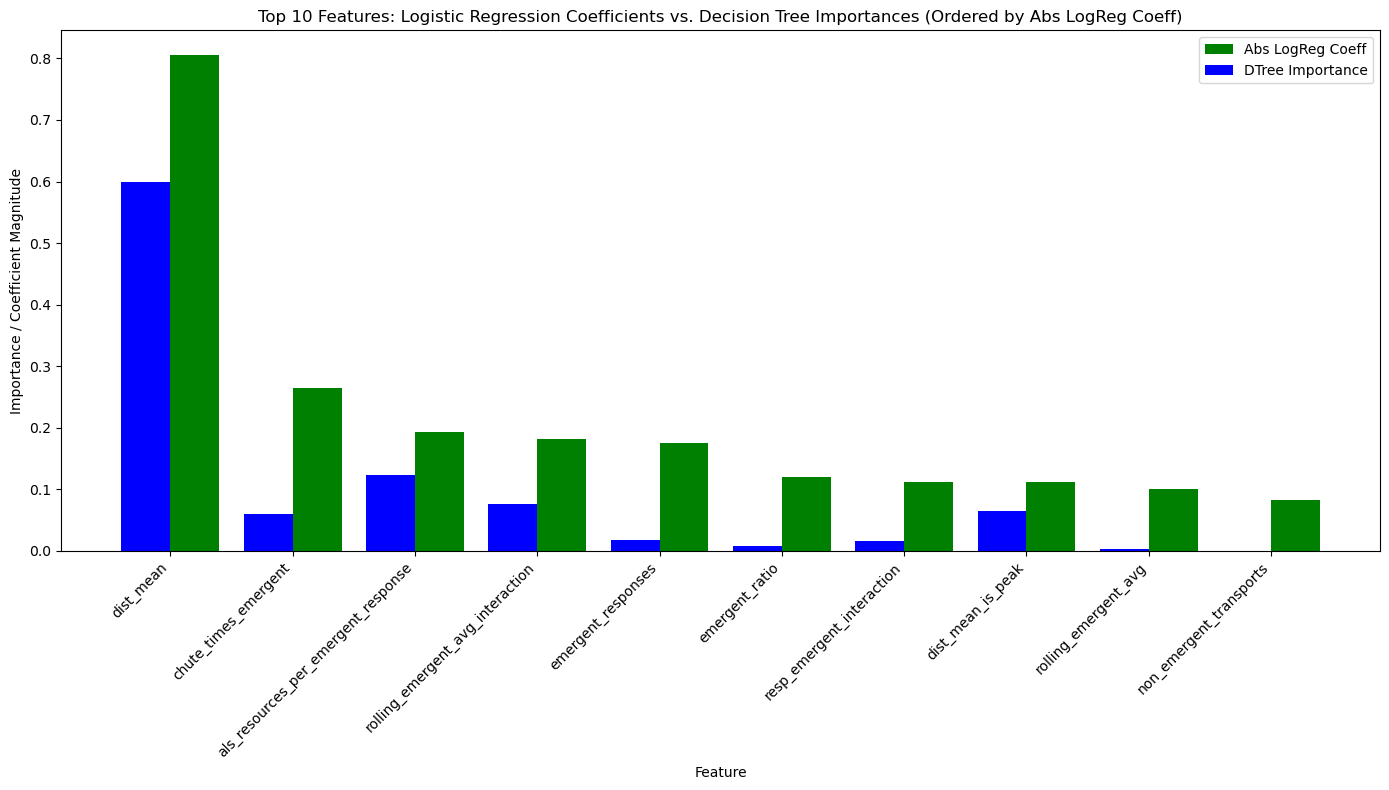

In [132]:
# Create DataFrame for Logistic Regression coefficients
logreg_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Abs_LogReg_Coeff': abs(best_model.named_steps['logreg'].coef_[0])
})

# Create DataFrame for Decision Tree feature importances
dtree_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'DTree_Importance': best_dtree.feature_importances_
})

# Merge the two DataFrames on the 'Feature' column
feature_comparison = pd.merge(
    logreg_coefficients, 
    dtree_importances, 
    on='Feature'
)

# Sort the feature comparison DataFrame by absolute logistic regression coefficients
feature_comparison = feature_comparison.sort_values(
    by='Abs_LogReg_Coeff', 
    ascending=False
)

# Display the combined table
print(feature_comparison)

# Plot side-by-side comparison of top 10 features (sorted by Abs_LogReg_Coeff)
top_features = feature_comparison.head(10)  # Adjust to show top 10 features

# Set up the plot
plt.figure(figsize=(14, 8))
x = np.arange(len(top_features))  # X positions for the bars
width = 0.4  # Width of the bars

# Bar plots for each metric
plt.bar(x + width/2, top_features['Abs_LogReg_Coeff'], width=width, color='green', label='Abs LogReg Coeff')
plt.bar(x - width/2, top_features['DTree_Importance'], width=width, color='blue', label='DTree Importance')

# Add feature labels and titles
plt.xticks(x, top_features['Feature'], rotation=45, ha='right')
plt.title('Top 10 Features: Logistic Regression Coefficients vs. Decision Tree Importances (Ordered by Abs LogReg Coeff)')
plt.xlabel('Feature')
plt.ylabel('Importance / Coefficient Magnitude')
plt.legend()
plt.tight_layout()
plt.show()

In [133]:
# Initializing an instance of my ComplianceTester class
tester = ComplianceTester(data)


=== Testing Feature: dist_mean ===

=== Kolmogorov-Smirnov Normality Test for dist_mean ===
Dist Mean - Compliant Results:
  KS Statistic: 0.0757
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Dist Mean - Compliant does not appear normally distributed.

Dist Mean - Non-Compliant Results:
  KS Statistic: 0.0683
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Dist Mean - Non-Compliant does not appear normally distributed.


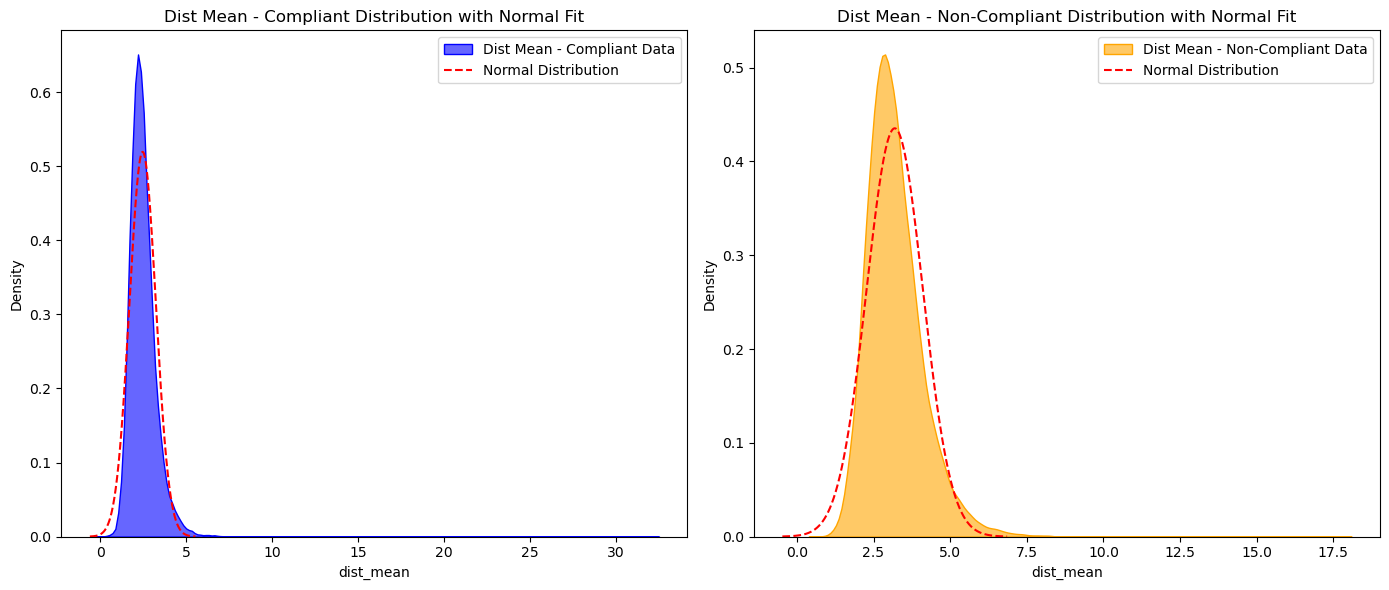


=== Mann-Whitney U Test for dist_mean ===
Testing Dist Mean - Compliant vs Dist Mean - Non-Compliant (Alternative Hypothesis: 'less')
  U Statistic: 157574213.0000
  P-Value: 0.0000
  Conclusion: Dist Mean - Compliant is significantly smaller (distribution-wise) than Dist Mean - Non-Compliant.


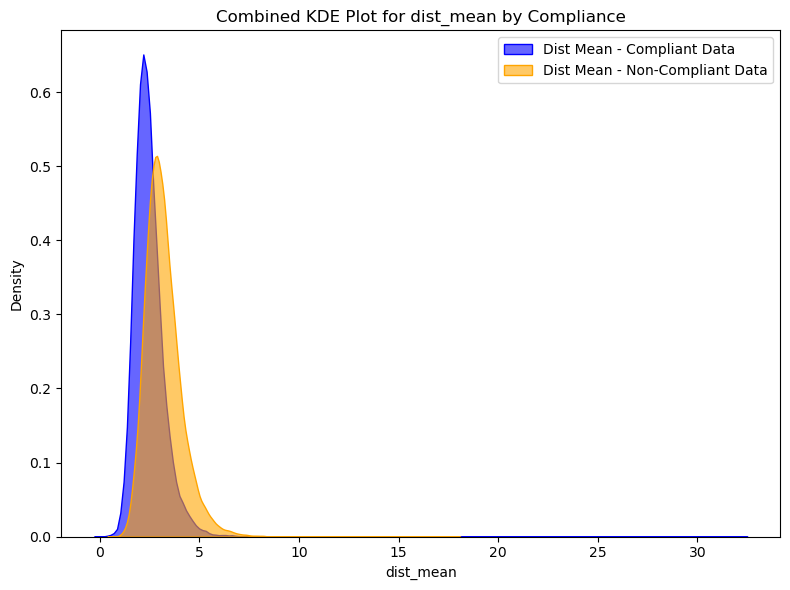


=== Summary Statistics for dist_mean ===
Dist Mean - Compliant Group:
  Median: 2.3520
  Mean: 2.4576
Dist Mean - Non-Compliant Group:
  Median: 3.0577
  Mean: 3.1916


In [134]:
# Hypothesis test using Mann-Whitney U Test
# Feature: dist_mean
# H0 (Null Hypothesis): The distribution of 'dist_mean' for the compliant group 
#                       is greater than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'dist_mean' for the compliant group 
#                               is less than the non-compliant group.

tester.test_feature(feature="dist_mean", alternative="less")


=== Testing Feature: dist_mean_is_peak ===

=== Kolmogorov-Smirnov Normality Test for dist_mean_is_peak ===
Dist Mean Is Peak - Compliant Results:
  KS Statistic: 0.2709
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Dist Mean Is Peak - Compliant does not appear normally distributed.

Dist Mean Is Peak - Non-Compliant Results:
  KS Statistic: 0.2350
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Dist Mean Is Peak - Non-Compliant does not appear normally distributed.


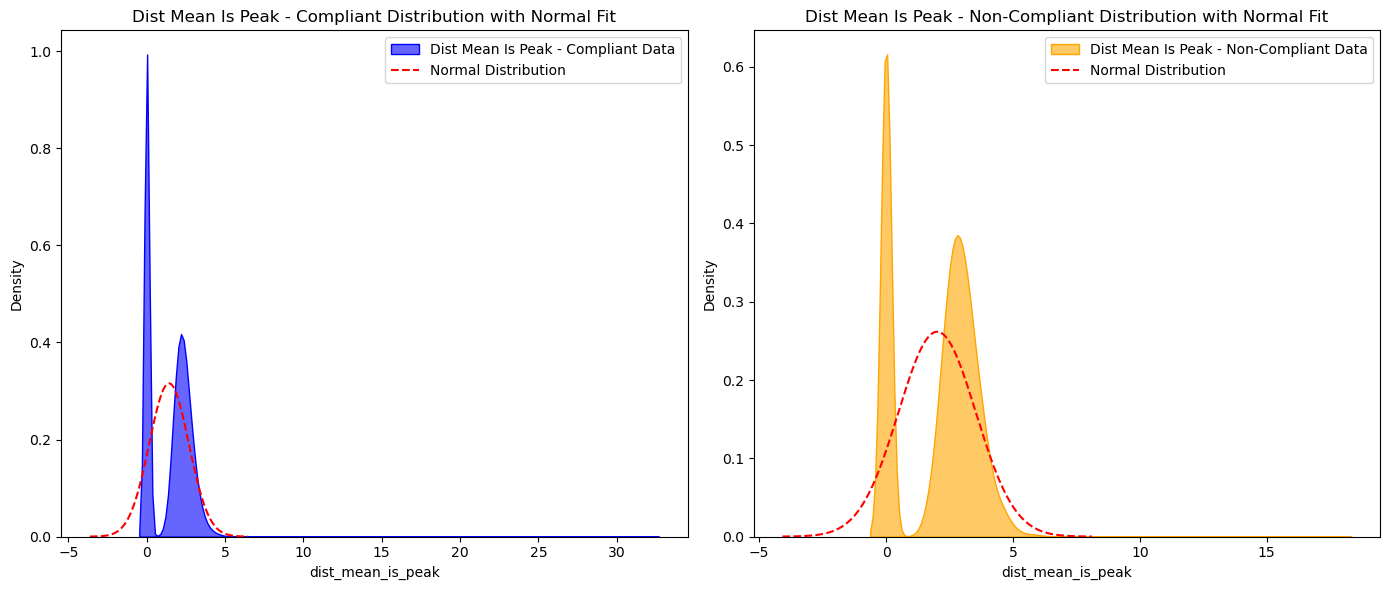


=== Mann-Whitney U Test for dist_mean_is_peak ===
Testing Dist Mean Is Peak - Compliant vs Dist Mean Is Peak - Non-Compliant (Alternative Hypothesis: 'less')
  U Statistic: 229875354.0000
  P-Value: 0.0000
  Conclusion: Dist Mean Is Peak - Compliant is significantly smaller (distribution-wise) than Dist Mean Is Peak - Non-Compliant.


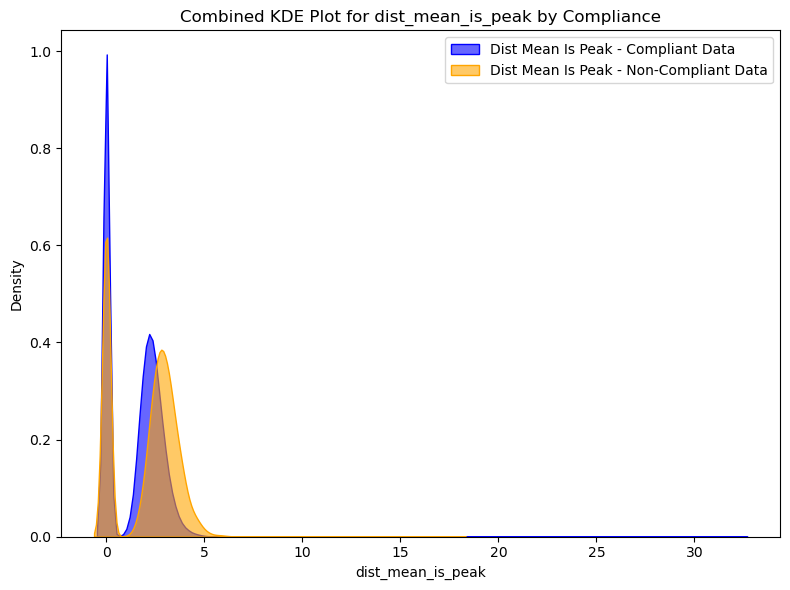


=== Summary Statistics for dist_mean_is_peak ===
Dist Mean Is Peak - Compliant Group:
  Median: 1.8054
  Mean: 1.4192
Dist Mean Is Peak - Non-Compliant Group:
  Median: 2.5125
  Mean: 2.0114


In [135]:
# Hypothesis test using Mann-Whitney U Test
# Feature: dist_mean_is_peak
# H0 (Null Hypothesis): The distribution of 'dist_mean_is_peak' for the compliant group 
#                       is greater than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'dist_mean_is_peak' for the compliant group 
#                               is less than the non-compliant group.

tester.test_feature(feature="dist_mean_is_peak", alternative="less")


=== Testing Feature: chute_times_emergent ===

=== Kolmogorov-Smirnov Normality Test for chute_times_emergent ===
Chute Times Emergent - Compliant Results:
  KS Statistic: 0.0711
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Chute Times Emergent - Compliant does not appear normally distributed.

Chute Times Emergent - Non-Compliant Results:
  KS Statistic: 0.0853
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Chute Times Emergent - Non-Compliant does not appear normally distributed.


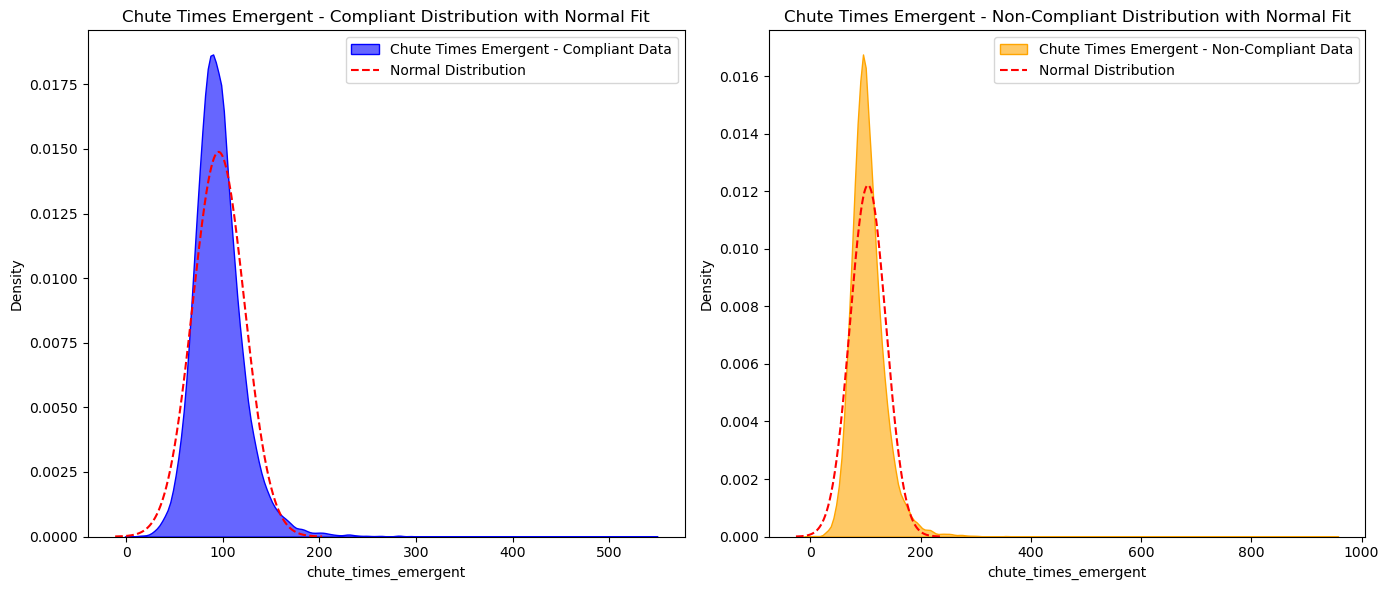


=== Mann-Whitney U Test for chute_times_emergent ===
Testing Chute Times Emergent - Compliant vs Chute Times Emergent - Non-Compliant (Alternative Hypothesis: 'less')
  U Statistic: 262892428.0000
  P-Value: 0.0000
  Conclusion: Chute Times Emergent - Compliant is significantly smaller (distribution-wise) than Chute Times Emergent - Non-Compliant.


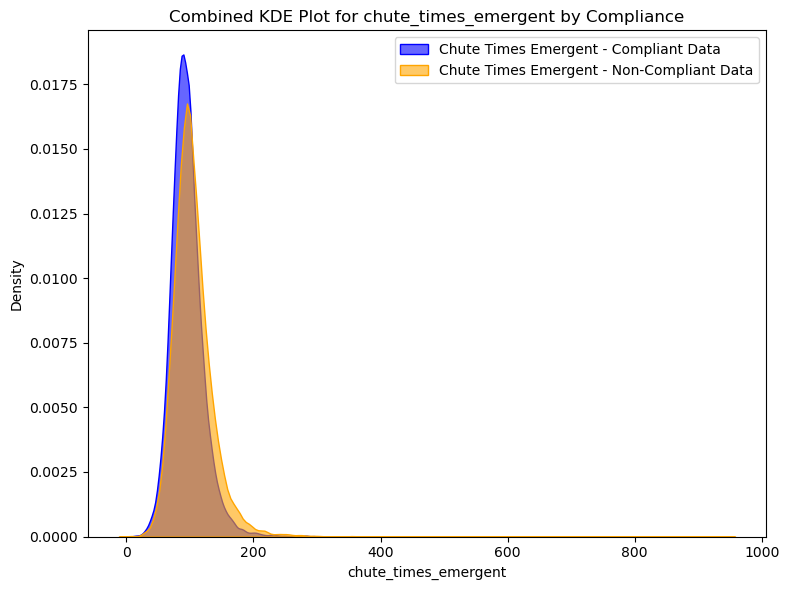


=== Summary Statistics for chute_times_emergent ===
Chute Times Emergent - Compliant Group:
  Median: 92.7500
  Mean: 95.5436
Chute Times Emergent - Non-Compliant Group:
  Median: 99.7717
  Mean: 104.4794


In [136]:
# Hypothesis test using Mann-Whitney U Test
# Feature: chute_times_emergent
# H0 (Null Hypothesis): The distribution of 'chute_times_emergent' for the compliant group 
#                       is greater than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'chute_times_emergent' for the compliant group 
#                               is less than the non-compliant group.

tester.test_feature(feature='chute_times_emergent', alternative='less')


=== Testing Feature: als_resources_per_emergent_response ===

=== Kolmogorov-Smirnov Normality Test for als_resources_per_emergent_response ===
Als Resources Per Emergent Response - Compliant Results:
  KS Statistic: 0.1666
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Als Resources Per Emergent Response - Compliant does not appear normally distributed.

Als Resources Per Emergent Response - Non-Compliant Results:
  KS Statistic: 0.1193
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Als Resources Per Emergent Response - Non-Compliant does not appear normally distributed.


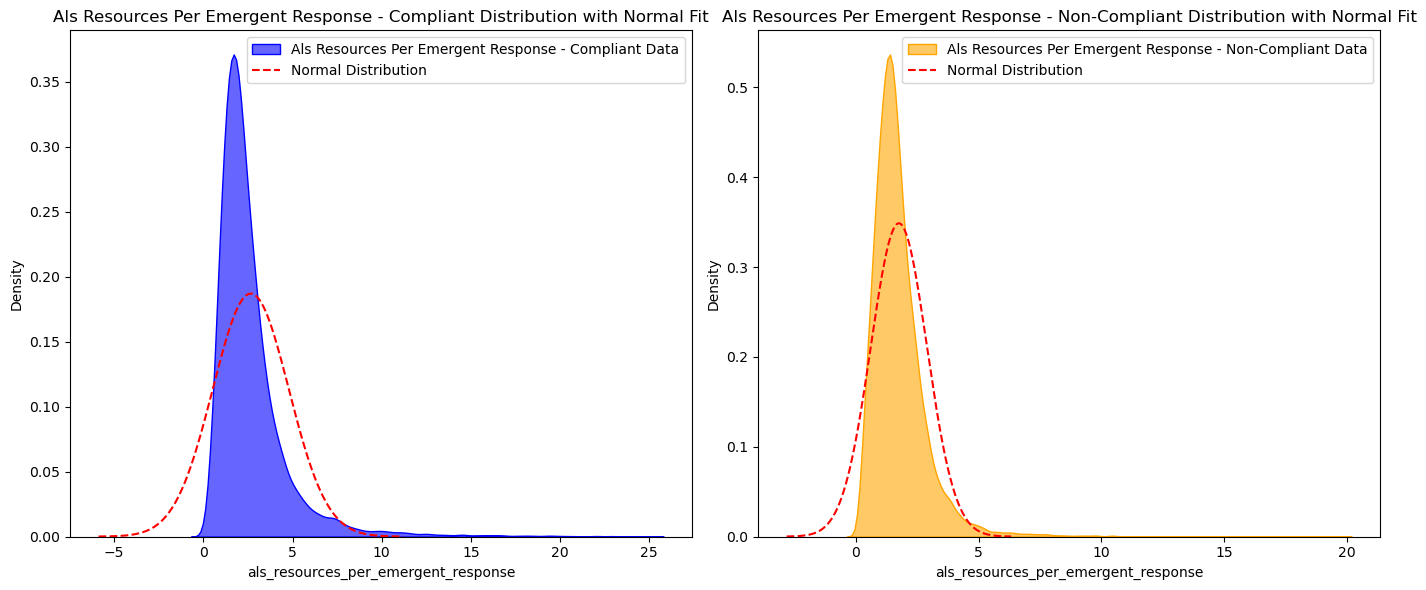


=== Mann-Whitney U Test for als_resources_per_emergent_response ===
Testing Als Resources Per Emergent Response - Compliant vs Als Resources Per Emergent Response - Non-Compliant (Alternative Hypothesis: 'greater')
  U Statistic: 427814871.0000
  P-Value: 0.0000
  Conclusion: Als Resources Per Emergent Response - Compliant is significantly larger (distribution-wise) than Als Resources Per Emergent Response - Non-Compliant.


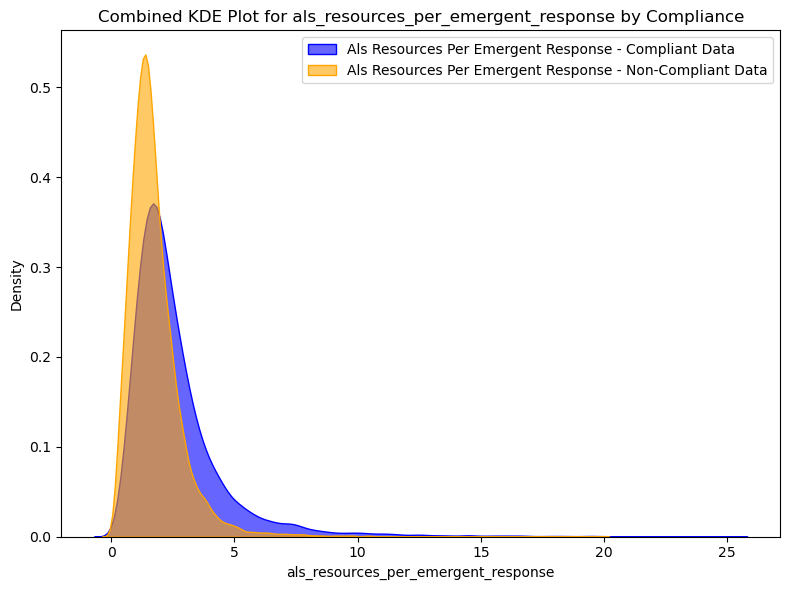


=== Summary Statistics for als_resources_per_emergent_response ===
Als Resources Per Emergent Response - Compliant Group:
  Median: 2.1195
  Mean: 2.6609
Als Resources Per Emergent Response - Non-Compliant Group:
  Median: 1.5278
  Mean: 1.7502


In [137]:
# Hypothesis test using Mann-Whitney U Test
# Feature: als_resources_per_emergent_response
# H0 (Null Hypothesis): The distribution of 'als_resources_per_emergent_response' for the compliant group 
#                       is less than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'als_resources_per_emergent_response' for the compliant group 
#                               is greater than the non-compliant group.

tester.test_feature(feature="als_resources_per_emergent_response", alternative="greater")


=== Testing Feature: resp_per_ambulance ===

=== Kolmogorov-Smirnov Normality Test for resp_per_ambulance ===
Resp Per Ambulance - Compliant Results:
  KS Statistic: 0.1556
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Resp Per Ambulance - Compliant does not appear normally distributed.

Resp Per Ambulance - Non-Compliant Results:
  KS Statistic: 0.1867
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Resp Per Ambulance - Non-Compliant does not appear normally distributed.


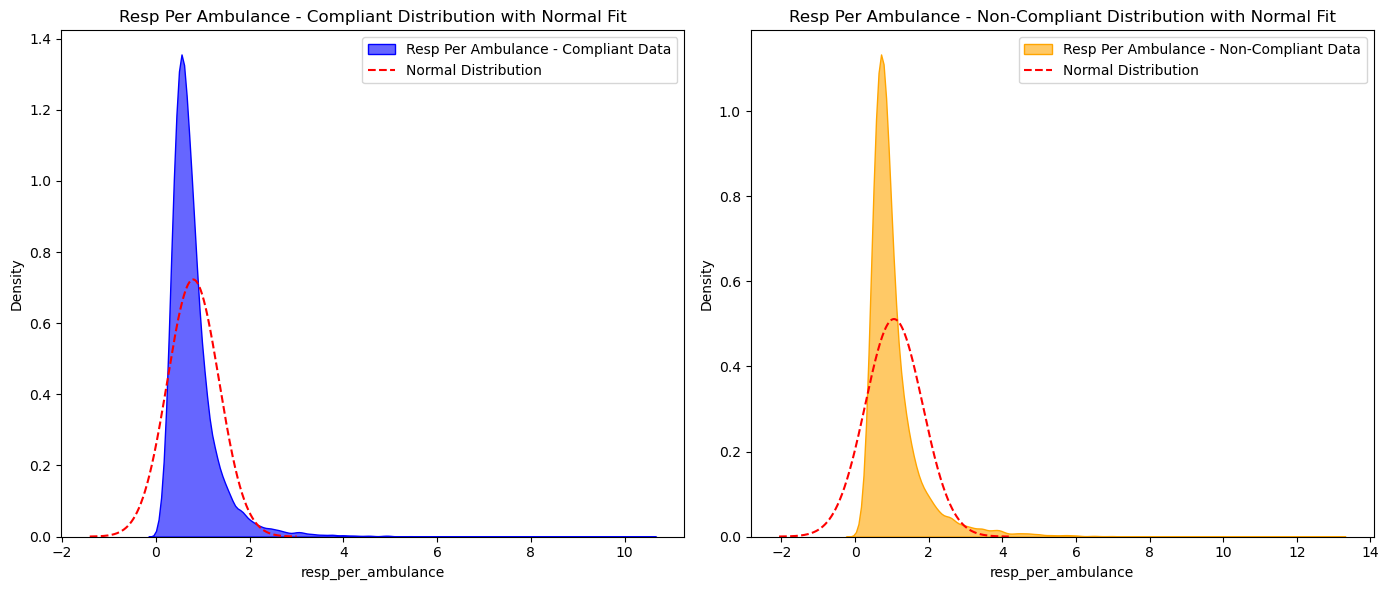


=== Mann-Whitney U Test for resp_per_ambulance ===
Testing Resp Per Ambulance - Compliant vs Resp Per Ambulance - Non-Compliant (Alternative Hypothesis: 'less')
  U Statistic: 229529295.5000
  P-Value: 0.0000
  Conclusion: Resp Per Ambulance - Compliant is significantly smaller (distribution-wise) than Resp Per Ambulance - Non-Compliant.


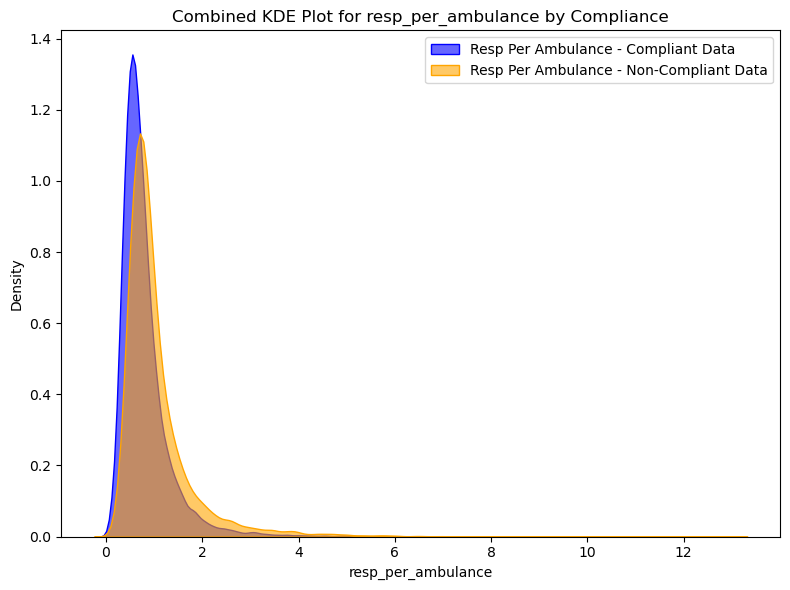


=== Summary Statistics for resp_per_ambulance ===
Resp Per Ambulance - Compliant Group:
  Median: 0.6631
  Mean: 0.7960
Resp Per Ambulance - Non-Compliant Group:
  Median: 0.8383
  Mean: 1.0560


In [138]:
# Hypothesis test using Mann-Whitney U Test
# Feature: resp_per_ambulance
# H0 (Null Hypothesis): The distribution of 'resp_per_ambulance' for the compliant group 
#                       is greater than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'resp_per_ambulance' for the compliant group 
#                               is less than the non-compliant group.

tester.test_feature(feature='resp_per_ambulance', alternative='less')


=== Testing Feature: non_emergent_transports ===

=== Kolmogorov-Smirnov Normality Test for non_emergent_transports ===
Non Emergent Transports - Compliant Results:
  KS Statistic: 0.0805
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Non Emergent Transports - Compliant does not appear normally distributed.

Non Emergent Transports - Non-Compliant Results:
  KS Statistic: 0.0708
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Non Emergent Transports - Non-Compliant does not appear normally distributed.


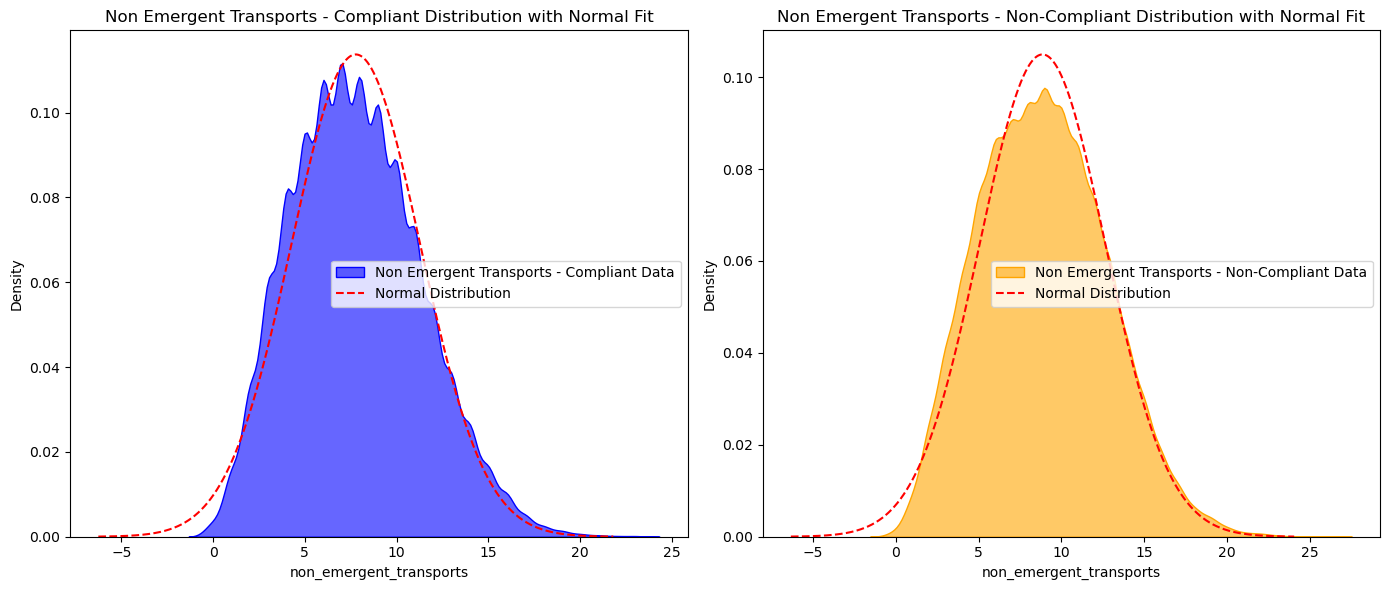


=== Mann-Whitney U Test for non_emergent_transports ===
Testing Non Emergent Transports - Compliant vs Non Emergent Transports - Non-Compliant (Alternative Hypothesis: 'less')
  U Statistic: 267463402.5000
  P-Value: 0.0000
  Conclusion: Non Emergent Transports - Compliant is significantly smaller (distribution-wise) than Non Emergent Transports - Non-Compliant.


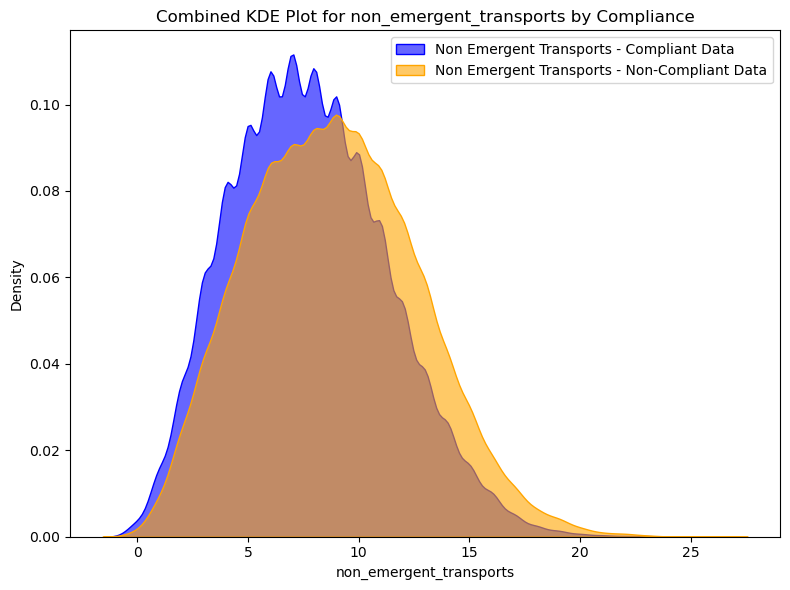


=== Summary Statistics for non_emergent_transports ===
Non Emergent Transports - Compliant Group:
  Median: 8.0000
  Mean: 7.7797
Non Emergent Transports - Non-Compliant Group:
  Median: 9.0000
  Mean: 8.8632


In [139]:
# Hypothesis test using Mann-Whitney U Test
# Feature: non_emergent_transports
# H0 (Null Hypothesis): The distribution of 'non_emergent_transports' for the compliant group 
#                       is greater than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'non_emergent_transports' for the compliant group 
#                               is less than the non-compliant group.

tester.test_feature(feature='non_emergent_transports', alternative='less')


=== Testing Feature: als_ambulances ===

=== Kolmogorov-Smirnov Normality Test for als_ambulances ===
Als Ambulances - Compliant Results:
  KS Statistic: 0.0773
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Als Ambulances - Compliant does not appear normally distributed.

Als Ambulances - Non-Compliant Results:
  KS Statistic: 0.0738
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Als Ambulances - Non-Compliant does not appear normally distributed.


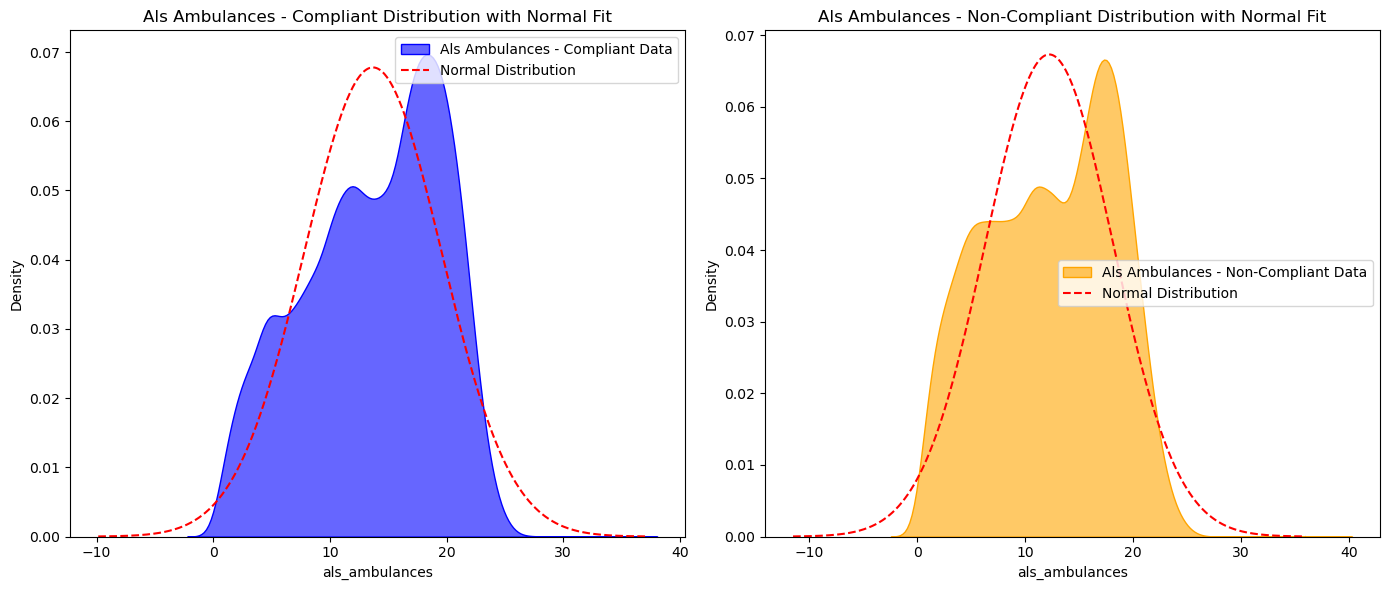


=== Mann-Whitney U Test for als_ambulances ===
Testing Als Ambulances - Compliant vs Als Ambulances - Non-Compliant (Alternative Hypothesis: 'greater')
  U Statistic: 364987179.5000
  P-Value: 0.0000
  Conclusion: Als Ambulances - Compliant is significantly larger (distribution-wise) than Als Ambulances - Non-Compliant.


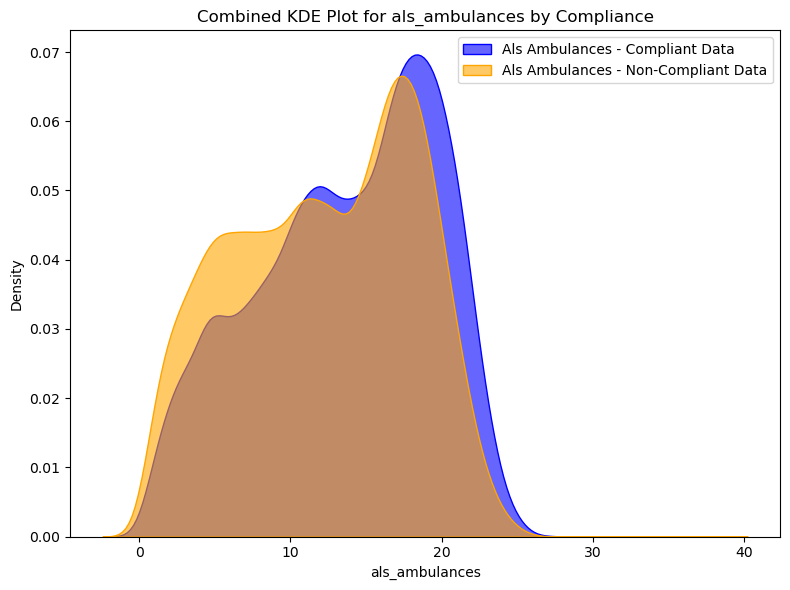


=== Summary Statistics for als_ambulances ===
Als Ambulances - Compliant Group:
  Median: 14.4675
  Mean: 13.6864
Als Ambulances - Non-Compliant Group:
  Median: 12.6653
  Mean: 12.2283


In [140]:
# Hypothesis test using Mann-Whitney U Test
# Feature: als_ambulances
# H0 (Null Hypothesis): The distribution of 'als_ambulances' for the compliant group 
#                       is less than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'als_ambulances' for the compliant group 
#                               is greater than the non-compliant group.

tester.test_feature(feature="als_ambulances", alternative="greater")


=== Testing Feature: total_cars ===

=== Kolmogorov-Smirnov Normality Test for total_cars ===
Total Cars - Compliant Results:
  KS Statistic: 0.0799
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Total Cars - Compliant does not appear normally distributed.

Total Cars - Non-Compliant Results:
  KS Statistic: 0.0784
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Total Cars - Non-Compliant does not appear normally distributed.


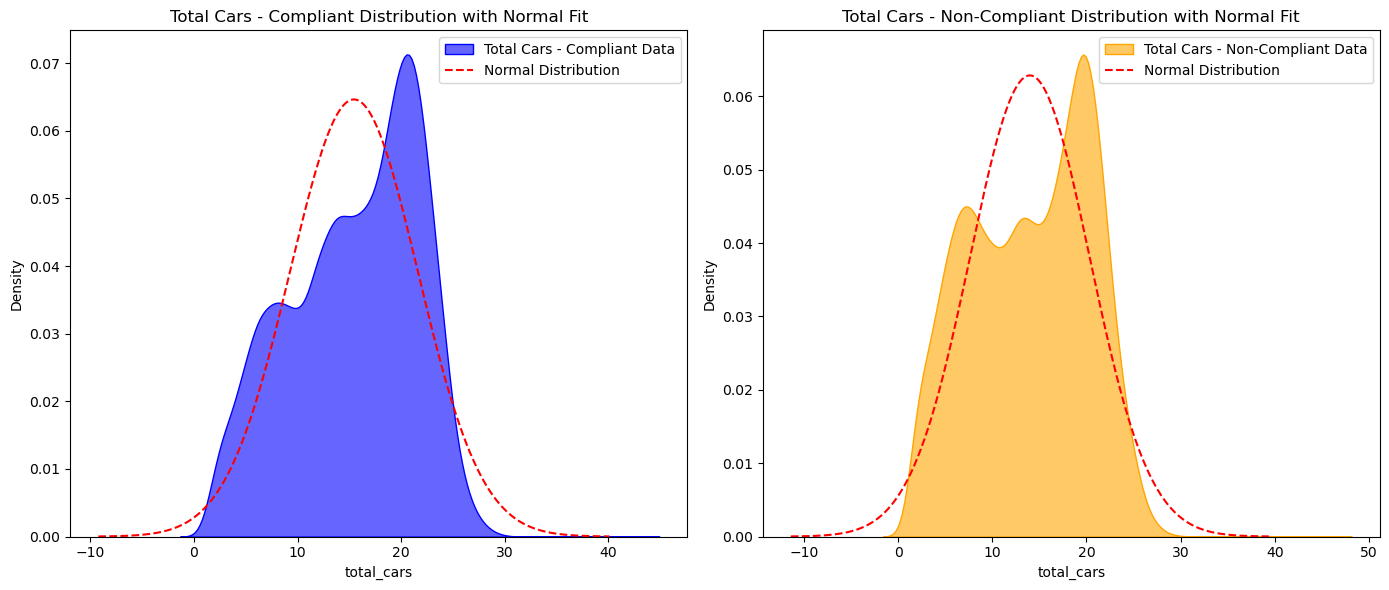


=== Mann-Whitney U Test for total_cars ===
Testing Total Cars - Compliant vs Total Cars - Non-Compliant (Alternative Hypothesis: 'greater')
  U Statistic: 362174009.5000
  P-Value: 0.0000
  Conclusion: Total Cars - Compliant is significantly larger (distribution-wise) than Total Cars - Non-Compliant.


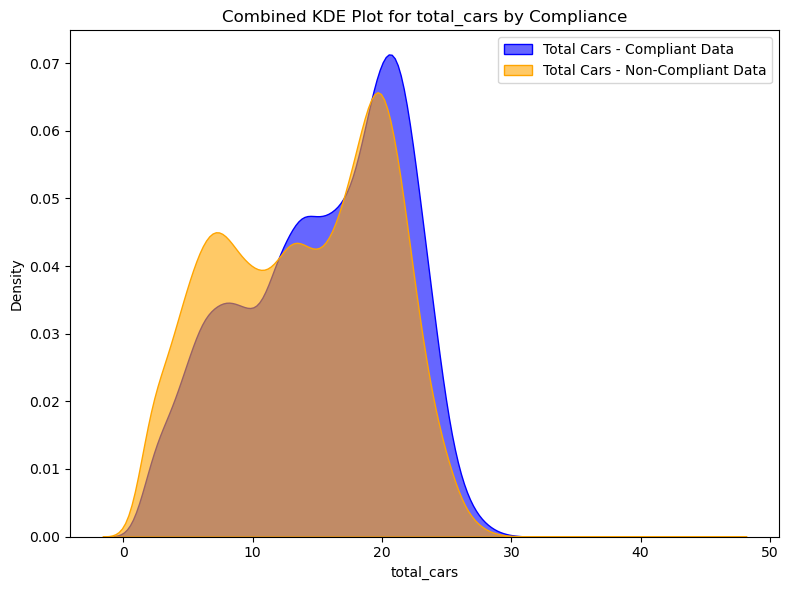


=== Summary Statistics for total_cars ===
Total Cars - Compliant Group:
  Median: 16.3306
  Mean: 15.4453
Total Cars - Non-Compliant Group:
  Median: 14.5222
  Mean: 13.9859


In [141]:
# Hypothesis test using Mann-Whitney U Test
# Feature: total_cars
# H0 (Null Hypothesis): The distribution of 'total_cars' for the compliant group 
#                       is less than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'total_cars' for the compliant group 
#                               is greater than the non-compliant group.

tester.test_feature(feature="total_cars", alternative="greater")


=== Testing Feature: perc_from_hosp ===

=== Kolmogorov-Smirnov Normality Test for perc_from_hosp ===
Perc From Hosp - Compliant Results:
  KS Statistic: 0.1308
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Perc From Hosp - Compliant does not appear normally distributed.

Perc From Hosp - Non-Compliant Results:
  KS Statistic: 0.0907
  P-Value: 0.0000
  Conclusion: Reject the null hypothesis. Perc From Hosp - Non-Compliant does not appear normally distributed.


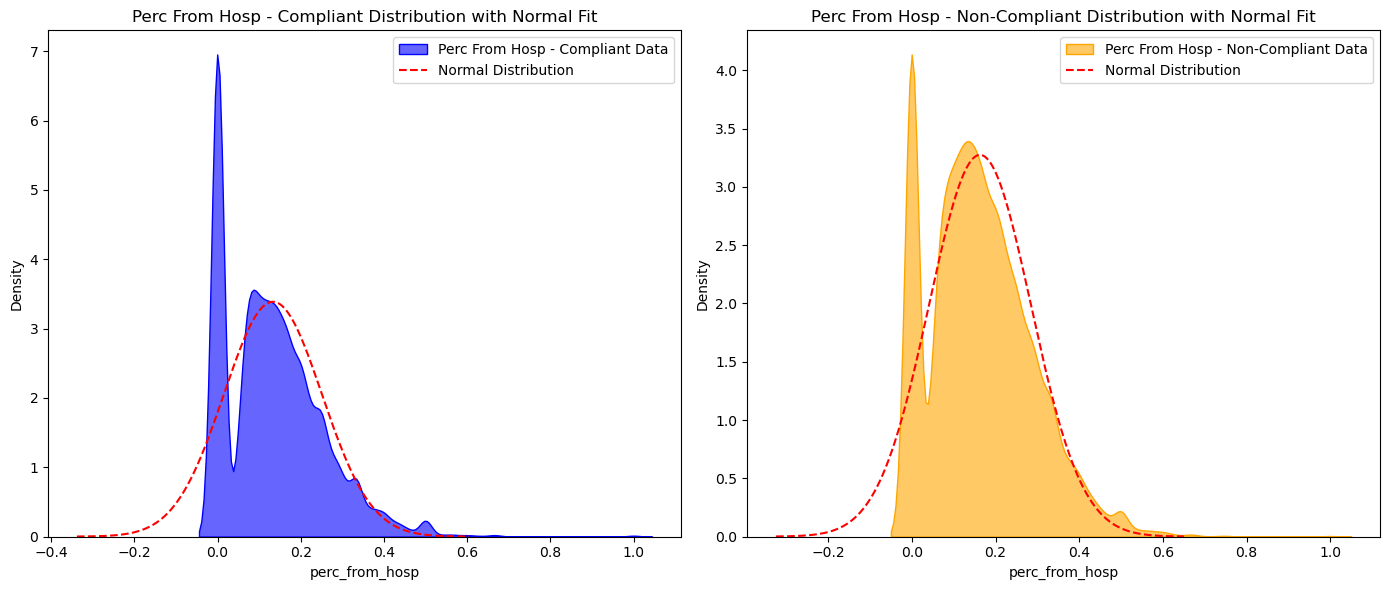


=== Mann-Whitney U Test for perc_from_hosp ===
Testing Perc From Hosp - Compliant vs Perc From Hosp - Non-Compliant (Alternative Hypothesis: 'less')
  U Statistic: 271687531.5000
  P-Value: 0.0000
  Conclusion: Perc From Hosp - Compliant is significantly smaller (distribution-wise) than Perc From Hosp - Non-Compliant.


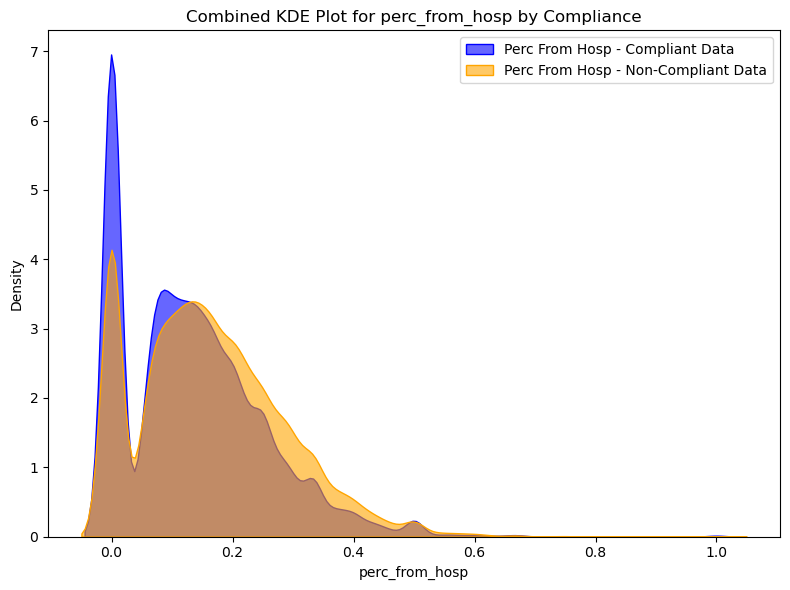


=== Summary Statistics for perc_from_hosp ===
Perc From Hosp - Compliant Group:
  Median: 0.1176
  Mean: 0.1329
Perc From Hosp - Non-Compliant Group:
  Median: 0.1500
  Mean: 0.1628


In [142]:
# Hypothesis test using Mann-Whitney U Test
# Feature: perc_from_hosp
# H0 (Null Hypothesis): The distribution of 'perc_from_hosp' for the compliant group 
#                       is greater than or equal to the non-compliant group.
# H1 (Alternative Hypothesis): The distribution of 'perc_from_hosp' for the compliant group 
#                               is less than the non-compliant group.

tester.test_feature(feature='perc_from_hosp', alternative='less')

## Recommendations

Based on the findings from the analysis, the following three actionable recommendations are proposed to improve Response Time Compliance (RTC). Each recommendation targets key factors identified in the analysis that the agency can directly influence. It is suggested that these changes be implemented for a determined period (e.g., 3–6 months), followed by a re-evaluation of the data to assess the impact of these changes on RTC.

---

### 1. Reduce Travel Distance During Peak Hours
**Findings**:
- **dist_mean** (average distance to incident) was identified as a critical factor affecting RTC, with **dist_mean_is_peak** further emphasizing the importance of resource positioning during busier times of the day.
- Longer travel distances during peak hours significantly reduced compliance rates.

**Recommendation**:
- Reevaluate resource placement locations to minimize travel distances, especially during peak hours (7 AM–9 PM).
- Develop a dynamic deployment strategy that adjusts resource locations based on historical and real-time incident data.
- Consider adding or redistributing resources to historically high-demand areas during peak times.

**Implementation**:
- For a 3-month period:
  1. Analyze historical data to identify areas with consistently high travel distances during peak hours.
  2. Implement changes to resource placement, including temporary stations or staging areas in strategic locations.
  3. Monitor RTC metrics and adjust placements dynamically based on incident trends.

---

### 2. Address Chute Time Delays
**Findings**:
- **chute_times_emergent** was strongly associated with RTC compliance, with non-compliant incidents showing significantly longer chute times.
- Potential contributing factors include time spent at hospitals, delayed responses during breaks, and situational challenges faced by crews.

**Recommendation**:
- Investigate the root causes of delayed chute times by:
  - Analyzing time spent at hospitals and considering policies to expedite hospital-based transitions.
  - Introducing a formalized “break” system that removes crews from active availability during rest periods, preventing them from being dispatched while occupied.
  - Engaging crews in non-accusatory discussions to gather insights on challenges affecting chute times.

**Implementation**:
- Over a 6-month period:
  1. Implement and test a break policy to reduce mid-shift delays (e.g., a 30-minute rest window for each shift where crews are not dispatchable).
  2. Launch an internal campaign to raise awareness about the impact of chute times on RTC and collect feedback from crews on improvement opportunities.
  3. Evaluate chute times monthly and compare pre- and post-policy metrics.

---

### 3. Optimize ALS Resources for Emergent Responses
**Findings**:
- **als_resources_per_emergent_response** showed strong importance in predicting RTC compliance.
- Analysis suggests inconsistencies in ALS staffing levels compared to emergent response demand, particularly during peak times.
- Non-emergent calls may be absorbing ALS resources unnecessarily, reducing availability for true emergencies.

**Recommendation**:
- Evaluate historical staffing patterns to ensure sufficient ALS resources are available during peak demand periods.
- Investigate opportunities to:
  - Increase the use of Basic Life Support (BLS) units for non-emergent calls.
  - Allow BLS units to handle emergent calls when ALS is unavailable.
  - Reassess dispatch codes to determine if certain incidents truly warrant emergent responses.

**Implementation**:
- For a 3-month period:
  1. Analyze emergent call volumes and ALS resource allocations during different times of the day.
  2. Adjust staffing ratios dynamically, ensuring adequate ALS resources during high-demand periods like evening rush hours.
  3. Test pilot programs allowing BLS units to handle emergent calls under specific guidelines or reevaluate dispatch codes to reduce unnecessary emergent calls.

---

### Follow-Up
After implementing these recommendations for 3–6 months, management should:
1. Reassess RTC metrics, focusing on the impact of these interventions.
2. Collect qualitative feedback from crews and dispatch teams on operational changes.
3. Identify opportunities for further optimization or adjustments based on the outcomes.

These iterative improvements, combined with data-driven strategies, will help the agency better align resources with demand, ultimately improving compliance and operational efficiency.


## Next Steps

To continue improving the analysis and gaining deeper insights into the factors influencing Response Time Compliance (RTC), the following steps are proposed for future data collection and exploration:

---

### 1. Collect and Analyze Routing Data
**Objective**:
- Improve the accuracy of distance and travel time metrics by analyzing actual routes taken during responses.

**Approach**:
- Collect GPS route data from vehicles during responses to map the actual paths taken to incident scenes.
- Use this data to calculate precise travel times and distances, factoring in road layouts, speed limits, and other constraints.
- Compare actual route data with dispatch predictions to evaluate routing efficiency.

**Potential Impact**:
- Identifying inefficient routing decisions or delays along specific routes could lead to improvements in navigation and dispatching strategies, ultimately reducing response times.

---

### 2. Perform Geographical Analysis by District
**Objective**:
- Understand how challenges and performance metrics vary across smaller geographic regions, such as districts or zones.

**Approach**:
- Segment the data by district or zone and analyze key metrics, such as average distances, RTC compliance, and resource utilization.
- Investigate whether certain districts consistently experience higher non-compliance rates or longer distances, potentially due to factors like population density, road infrastructure, or resource placement.
- Tailor strategies for each district, such as relocating resources or adjusting staffing levels to address specific challenges.

**Potential Impact**:
- District-level analysis would provide a more localized understanding of operational challenges, enabling targeted interventions that address the unique needs of each region.

---

### 3. Factor in Real-Time Traffic and Congestion Data
**Objective**:
- Incorporate real-world traffic conditions to understand how road congestion impacts response times, particularly during peak hours.

**Approach**:
- Integrate historical and real-time traffic data from services like Google Maps API or similar platforms.
- Correlate traffic congestion levels with response times to identify high-risk zones and times.
- Test dynamic dispatch strategies that account for traffic patterns when assigning units to incidents.

**Potential Impact**:
- Understanding traffic patterns could inform better resource placement strategies and dynamic dispatching decisions to mitigate delays.

---

### 4. Investigate Non-Overlapping KDE Regions
**Objective**:
- Investigate incidents that fall within the non-overlapping regions of KDE plots (e.g., where the density of non-compliant data does not overlap with compliant data).

**Approach**:
- Filter and analyze the subset of data corresponding to the regions between the right tails of the compliant and non-compliant KDE plots, as seen in the provided example.
- Conduct in-depth exploration of these outliers to identify patterns or characteristics unique to non-compliant incidents, such as extreme distances, delays, or resource unavailability.

**Potential Impact**:
- This targeted analysis could uncover specific scenarios or root causes driving non-compliance, providing actionable insights for improvement.

---

### 5. Analyze `perc_from_hosp` by Hospital
**Objective**:
- Determine whether specific hospitals are contributing to delays that prevent crews from returning to service efficiently.

**Approach**:
- Break down the `perc_from_hosp` metric by individual hospital to identify facilities with high rates of delayed returns.
- Engage in discussions with hospital EMS liaisons to understand potential factors, such as prolonged handoff times, delays in unloading patients, or other systemic issues.
- Develop tailored strategies with hospitals to improve efficiency, such as streamlining handoff procedures or prioritizing EMS vehicle turnaround times.

**Potential Impact**:
- Identifying hospital-specific delays will allow for focused operational improvements and foster collaboration with hospitals to reduce bottlenecks and enhance response readiness.

---

### 6. Adapt Project to Handle Individual Call Data
**Objective**:
- Expand this project to analyze individual call data for higher resolution and more specific factor analysis, potentially leading to more targeted interventions.

**Approach**:
- Shift from aggregated data (hourly metrics) to individual call records, capturing factors like call type, specific response times, and unit-level performance.
- Include additional features such as patient condition, specific incident location type, and on-scene time for more granular insights.
- Develop call-level predictive models to identify compliance risks at the individual call level.

**Potential Impact**:
- Analyzing individual call data would enable precise identification of delays or inefficiencies on a per-call basis, allowing for more tailored operational strategies.
- This higher-resolution analysis could also uncover systemic issues that aggregated data might obscure, providing a more detailed understanding of RTC dynamics.

---

### 7. Expand Feature Set for Future Models
**Objective**:
- Collect and integrate additional data sources to enhance the predictive power of future models.

**Approach**:
- Include features like weather severity indices, incident location type (e.g., residential, industrial, or public areas), and time-specific staffing levels.
- Develop features representing vehicle utilization and dispatch efficiency during different times of the day.

**Potential Impact**:
- A richer feature set will improve the ability to identify nuanced factors affecting RTC and enable more targeted interventions.

---

### Summary

These next steps aim to deepen the geographical, temporal, and operational understanding of RTC dynamics by leveraging more detailed and diverse data sources. District-level analysis and routing data collection will enable localized strategies, while individual call-level modeling and expanded feature sets will provide more granular and actionable insights for future improvements.
